# CREDIT EDA CASE STUDY - BANK LOAN APPLICATION

## Business Objective

#### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# 1. Import the Relevant Library

In [1188]:
#importing library
import numpy as np   # for arrays
import pandas as pd   # for pandas dataframe
import matplotlib.pyplot as plt  # for plotting graph and charts
import seaborn as sns # for plotting interactive graph and charts

In [1189]:
pd.set_option("display.max_columns" ,None)  # displaying the no of the column in the notebook
pd.set_option('display.max_rows',None)   # displaying all the records in the notebook for anaylsis

In [1190]:
import warnings     # for ignoring the warnings
warnings.filterwarnings('ignore')

In [1191]:
# setting the classpath to access the folder
%cd D:\UpgradFolder\Credit EDA Case Study   

D:\UpgradFolder\Credit EDA Case Study


# 2. Loading the DataSet & Inspecting

In [1192]:
# importing the application_data.csv dataset
application_data = pd.read_csv("application_data.csv")

In [1193]:
# analyzing the overview of the data set 
application_data.head()  

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [1194]:
# analyzing the last 5 data rows
application_data.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

## Examine the DataSet Deeply

In [1195]:
# checking the information through info() method
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [1196]:
# checking the no of column and rows through shape() method
application_data.shape

(307511, 122)

In [1197]:
# checking the statistic data such as mean ,meadian through describe method
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Checking the NULL Values in the DataSet as it affect the analysis

In [1198]:
# checking the count of null values
application_data.isnull().sum()  

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [1199]:
# from the above it is difficult to analyze the null values so we are taking the percentages of null values in the given dataset
percentage_null =  application_data.isnull().sum()/len(application_data)*100

In [1200]:
percentage_null.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

> From the above analysis we conclude that the some column have more than 45% of null data values which affect deeply in further analysis And we can't analyse column due to major percentage of null values and also can't drop the column because majority of data will lost,hence drop all the columns.

# Data Cleaning

In [1201]:
# dropping the column having more than 45% of null values in data set
delete_perc = 45.0
count = int(((100-delete_perc)/100)*application_data.shape[0]+1)
application_data.dropna(axis=1,thresh=count,inplace=True)

In [1202]:
application_data.shape

(307511, 73)

In [1203]:
# checking the percentage of null values again
new_percentage_null = application_data.isnull().sum()/len(application_data)*100
new_percentage_null.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

# Missing Values Handling 

## From the Above table we only impute the  column having null values less than 15%

#### 1) Impute OCCUPATIONAL_TYPE column

In [1204]:
## handling the OCCUPATIONAL_TYPE null values
application_data['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

> From the above we analysis that the missing values is very high. So we can create a new unknown category because replacing the missing value with mode will create a biased towards one column. 

### Note : As per guidelines, it is not necessary to impute the missing values in EDA

#### 2)Impute AMT_REQ_CREDIT_BUREAU_YEAR column

In [1205]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.0     71801
1.0     63405
2.0     50192
NaN     41519
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

>  SInce AMT_REQ_CREDIT_BUREAU_YEAR is the credit inquiry number so imputing missing value with mode make more sense and reliable. 

In [1206]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

In [1207]:
# application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)

In [1208]:
print('We can Impute the missing value of the column with the mode that is : ', application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

We can Impute the missing value of the column with the mode that is :  0.0


### SImilarly All the Credit inquiry number we can replace it to mode make more sense and reliable

#### 3) Impute AMT_REQ_CREDIT_BUREAU_QRT column

In [1209]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

In [1210]:
# application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)

#### 4) Impute AMT_REQ_CREDIT_BUREAU_MON column

In [1211]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
dtype: float64

In [1212]:
# application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)

#### 5) Impute AMT_REQ_CREDIT_BUREAU_WEEK column

In [1213]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
dtype: float64

In [1214]:
# application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)

#### 6) Impute AMT_REQ_CREDIT_BUREAU_DAY column

In [1215]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
dtype: float64

In [1216]:
# application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)

#### 7) AMT_REQ_CREDIT_BUREAU_HOUR column

In [1217]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
dtype: float64

In [1218]:
# application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)

## Impute NAME_TYPE_SUITE Column

In [1219]:
application_data['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

> - We analyze that the column is the categorical data. Hence replacing the missing values with the mode make more sense

In [1220]:
# checking the mode values of NAME_TYPE_SUITE
application_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [1221]:
# fill the missing values in NAME_TYPE_SUITE
application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)

## Impute  EXT_SOURCE_2 column

In [1222]:
application_data['EXT_SOURCE_2'].value_counts()

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
2.290030e-01     67
2.962028e-01     67
3.454859e-01     67
2.746463e-01     66
2.598076e-01     64
2.974306e-01     64
2.629359e-01     61
3.102603e-01     61
1.548483e-01     59
2.533716e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
6.019534e-01     55
1.535706e-01     55
2.015837e-01     54


#### Since EXT_SOURCE_2 is a categorial column we can check for outliners in data 

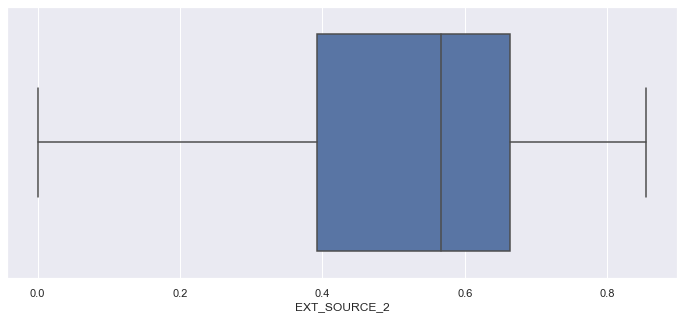

In [1223]:
# plotting the box plot for checking the outliners..
plt.figure(figsize=[12,5])
sns.boxplot(application_data['EXT_SOURCE_2'])
plt.show()

In [1224]:
# since there is no outliners in the data we can compute the missing values with mean data
mean_ext_source_2 = application_data['EXT_SOURCE_2'].mean()
mean_ext_source_2 = round(mean_ext_source_2,2)
mean_ext_source_2

0.51

In [1225]:
# imputing the missing values with mean
application_data['EXT_SOURCE_2'].fillna(mean_ext_source_2, inplace=True)

In [1226]:
print('We impute the missing values of EXT_SOURCE_2 with mean i.e : ' , mean_ext_source_2)

We impute the missing values of EXT_SOURCE_2 with mean i.e :  0.51


## Impute AMT_GOODS_PRICE column

In [1227]:
application_data['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

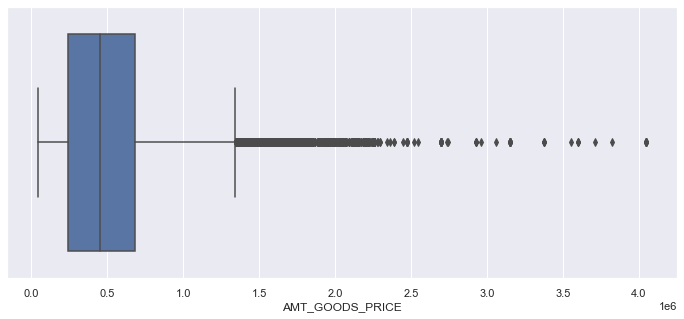

In [1228]:
plt.figure(figsize=[12,5])
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

### Outliners in the data heavily impact on the mean and hence it does not make any sense to use mean to fill values and using the median to fill values does make a sense.

In [1229]:
# since there are outliners in the data we can compute the missing values with median data

median_amt_good_price = application_data['AMT_GOODS_PRICE'].median()
median_amt_good_price = round(median_amt_good_price,2)
median_amt_good_price

450000.0

In [1230]:
# imputing the missing values with meadian
application_data['AMT_GOODS_PRICE'].fillna(median_amt_good_price, inplace=True)

In [1231]:
print('We impute the missing values of AMT_GOODS_PRICE with mean i.e : ' , median_amt_good_price)

We impute the missing values of AMT_GOODS_PRICE with mean i.e :  450000.0


## Impute AMT_ANNUITY column

In [1232]:
application_data['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
14350.5      564
32895.0      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
35937.0      418
24543.0      418
25321.5      417
24246.0      4

#### Since AMT_ANNUITY is a categorial column we can check for outliners in data 

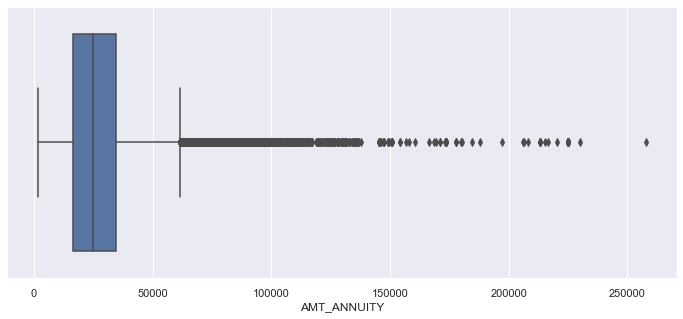

In [1233]:
plt.figure(figsize=[12,5])
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

In [1234]:
# since there are outliners in the data we can compute the missing values with median data
median_amt_annuity = application_data['AMT_ANNUITY'].median()
median_amt_annuity = round(median_amt_annuity,2)
median_amt_annuity

24903.0

In [1235]:
# imputing the missing values with meadian
application_data['AMT_ANNUITY'].fillna(median_amt_annuity, inplace=True)

In [1236]:
print('We impute the missing values of AMT_ANNUITY with mean i.e : ' , median_amt_annuity)

We impute the missing values of AMT_ANNUITY with mean i.e :  24903.0


## Impute  CNT_FAM_MEMBERS Column

In [1237]:
application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

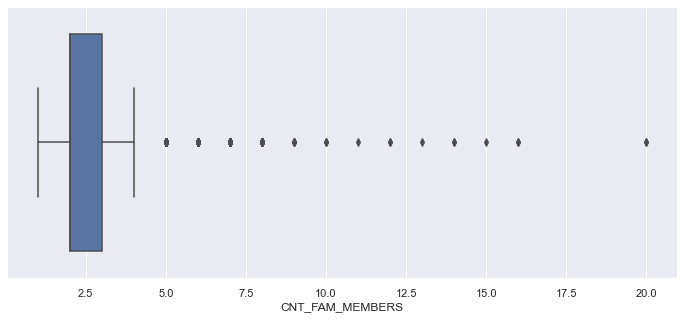

In [1238]:
# from above we get to know that it is a contineous variable so we can check that that outliner is present or not in data
plt.figure(figsize=[12,5])
sns.boxplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

In [1239]:
# since there are outliners in the data we can compute the missing values with median data which makes sense
median_cnt_fam_members = application_data['CNT_FAM_MEMBERS'].median()
median_cnt_fam_members = round(median_cnt_fam_members,2)
median_cnt_fam_members

2.0

In [1240]:
# imputing the missing values with meadian
application_data['CNT_FAM_MEMBERS'].fillna(median_cnt_fam_members, inplace=True)

In [1241]:
print('We impute the missing values of CNT_FAM_MEMBERS with meadian i.e : ' , median_cnt_fam_members)

We impute the missing values of CNT_FAM_MEMBERS with meadian i.e :  2.0


# Handling DataTypes of the columns

In [1242]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [1243]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [1244]:
# From the above table we get to know that tha DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION ,DAYS_ID_PUBLISH has some negative number.
print('DAYS_BIRTH' , application_data['DAYS_BIRTH'].unique() , '\nDAYS_EMPLOYED',application_data['DAYS_EMPLOYED'].unique() , 
     '\nDAYS_REGISTRATION',application_data['DAYS_REGISTRATION'].unique(),'\nDAYS_ID_PUBLISH',application_data['DAYS_ID_PUBLISH'].unique())



DAYS_BIRTH [ -9461 -16765 -19046 ...  -7951  -7857 -25061] 
DAYS_EMPLOYED [  -637  -1188   -225 ... -12971 -11084  -8694] 
DAYS_REGISTRATION [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.] 
DAYS_ID_PUBLISH [-2120  -291 -2531 ... -6194 -5854 -6211]


In [1245]:
negativeColumn = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' ,'DAYS_LAST_PHONE_CHANGE']

In [1246]:
# using abs function converting the negative column to positive column
application_data[negativeColumn] = abs(application_data[negativeColumn])

## Checking All the Float DataType Column

In [1247]:
application_data.select_dtypes(include="float64").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [1248]:
# From the about column some of the column are actual float while some column should be count.. Converting those column to 
#integer which make it easiour for analysis in future
#AMT columns are the Number of enquiries to Credit Bureau which is a int datatype number
# Whiel OBS and DEF are the count of observation of client's social surroundings which is a int variable  

convert_column_to_int = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                         'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'  ]

In [1249]:
# converting float to int
application_data.loc[:,convert_column_to_int] = application_data.loc[:,convert_column_to_int].apply(lambda x : x.astype('int64',errors='ignore'))


## Checking the Object DataType Column

In [1250]:
application_data.select_dtypes(include="object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [1251]:
# convert all these object column to String which make more sense
convert_column_to_string = list(application_data.select_dtypes(include="object").columns)
application_data.loc[:,convert_column_to_string] = application_data.loc[:,convert_column_to_string].apply(lambda x : x.astype('str',errors='ignore'))

In [1252]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Handling the Gender column

In [1253]:
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [1254]:
# replacing the XNA value with F make more sense
application_data.loc[application_data['CODE_GENDER'] == 'XNA' ,'CODE_GENDER' ] = 'F'

In [1255]:
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [1256]:
application_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

# Binning the contineous variable as it gives the category and readability of data increase

####  AMT_INCOME_TOTAL -  Income of the client - We can group in VeryLow, Low, Medium ,High, VeryHigh
####  AMT_CREDIT -  Credit amount of the loan -  We can group in VeryLow, Low, Medium ,High, VeryHigh

In [1257]:
application_data['AMT_INCOME_CATEGORY'] = pd.qcut(application_data['AMT_INCOME_TOTAL'], q=[0,0.15,0.4,0.6,0.85,1], labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])

In [1258]:
application_data['AMT_INCOME_CATEGORY'].head()

0        High
1    VeryHigh
2     VeryLow
3         Low
4         Low
Name: AMT_INCOME_CATEGORY, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [1259]:
application_data['AMT_CREDIT_CATEGORY'] = pd.qcut(application_data['AMT_CREDIT'], q=[0,0.15,0.4,0.6,0.85,1], labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])

In [1260]:
application_data['AMT_CREDIT_CATEGORY'].head()

0         Low
1    VeryHigh
2     VeryLow
3         Low
4      Medium
Name: AMT_CREDIT_CATEGORY, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

### DAYS_BIRTH - Client's age in days at the time of application

In [1261]:
# we have client age in days we have to convert it into years first
application_data['DAYS_BIRTH'] =  application_data['DAYS_BIRTH']/365


In [1262]:
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].astype(int)

In [1263]:
application_data['DAYS_BIRTH'].head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int32

In [1264]:
application_data['AGE_CATEGORY'] = pd.cut(application_data['DAYS_BIRTH'], bins=[18,28,40,65,100], labels=['YOUNG','ADULT','MIDDLE_AGE','SENIORCITIZEN'])

In [1265]:
application_data['AGE_CATEGORY'].head()

0         YOUNG
1    MIDDLE_AGE
2    MIDDLE_AGE
3    MIDDLE_AGE
4    MIDDLE_AGE
Name: AGE_CATEGORY, dtype: category
Categories (4, object): ['YOUNG' < 'ADULT' < 'MIDDLE_AGE' < 'SENIORCITIZEN']

## After Analyzing the column selecting the most relevant column for the analysis as per the problem statement

In [1266]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [1267]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [1268]:
final_columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_CATEGORY', 'AMT_CREDIT_CATEGORY', 'AGE_CATEGORY']

In [1269]:
len(final_columns)

45

# Analysis Of Outliners In Columns

#### Detection of Ouliners is an important step as it indicated the incorrect data or the data which is irrrelevent to analysis

In [1270]:
# Lets check out the head of dataframe first
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [1271]:
# the final datafram that we are to work on based on our proble statement
Final_application_data = application_data[final_columns]

In [1272]:
Final_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0 

## Checking Outliners for Contineous Variable

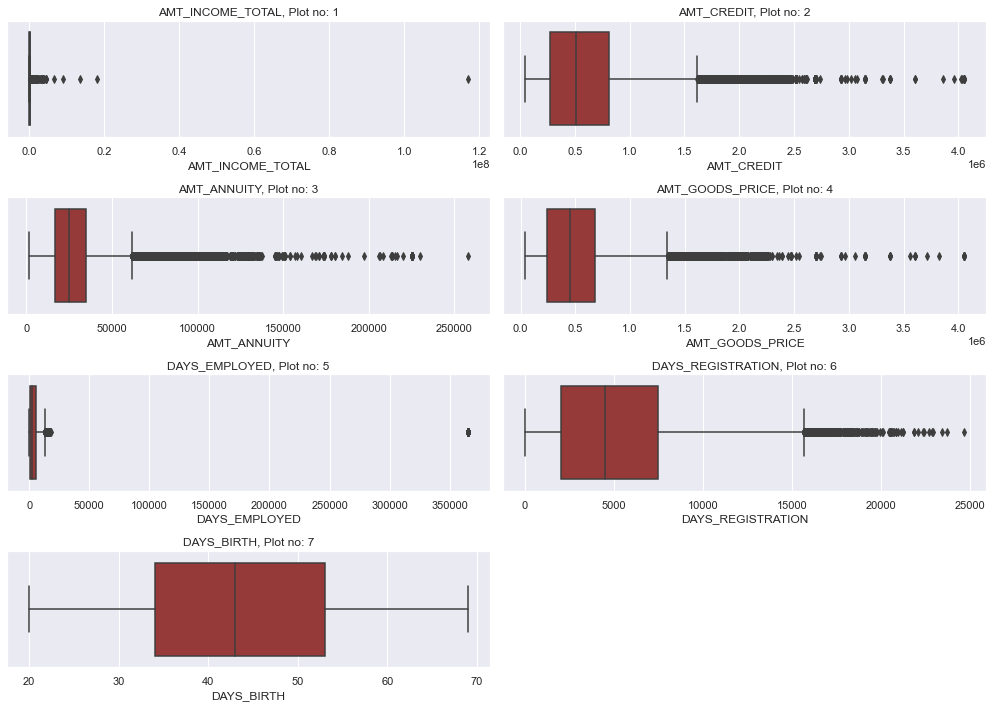

In [1273]:
## For the outliners detection we can use BOX PLOT which is efficient to detecting outliners

## We are taking the categorical column for the outliners
checking_outliners = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH' ]
c = 1
fig = plt.figure(figsize=(14,10))
for i in checking_outliners:
    plt.subplot(4,2,c)
    plt.title('{}, Plot no: {}'.format(i ,c))
    sns.boxplot(Final_application_data[i] ,color = 'brown')
    c = c +1
    
plt.tight_layout()
    
plt.show()
    


## Some important point from the above plot to be noted
>   -AMT_INCOME_TOTAL  is the income of the client and max value which is 117M is surely an outliners. </br></br>  -   AMT_CREDIT  is the credit amout of loan.We observe that value greater than 4050000.0 is surely an outliners </br></br> -  AMT_ANNUITY  is the Loan annuity.We observe that value greater than 250000.0 is surely an outliners   </br></br> -  AMT_GOODS_PRICE is the price of the goods for which the loan is given.We observe that value greater than 4000000.0 is surely an outliners .  </br></br>  - DAYS_EMPLOYED column has an ouliners value 365243.0 </br></br> -  DAYS_REGISTRATION column is how many days before the application did client change his registration . Value which is greater than 24000 is surely an outliners </br></br> -  DAYS_BIRTH column there is no observer outliners.

In [1274]:
## We need to check the statistical values to deeply observe the statistical value of outliners
for i in checking_outliners:
    print('\n')
    print(Final_application_data[i].describe())
    print('\n')



count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64




count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64




count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64




count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        

## Treating the outliners 
#### q1 = Final_application_data['AMT_INCOME_TOTAL'].describe()["25%"]
#### q3 = Final_application_data['AMT_INCOME_TOTAL'].describe()["75%"]
#### IQR = q3 -q1
#### lower_bound = q1 - 1.5 * IQR
#### upper_bound = q3 + 1.5 * IQR
## We can use the method of Flooring for treating the outliners
#### Final_application_data['AMT_INCOME_TOTAL'] = np.where(Final_application_data['AMT_INCOME_TOTAL'] > upper_bound, upper_bound ,Final_application_data['AMT_INCOME_TOTAL'])

# Divide The Target Variable Into 2 Parts - Target 0 & Target 1

In [1275]:
Final_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0 

#### 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

#### 0 - All the cases

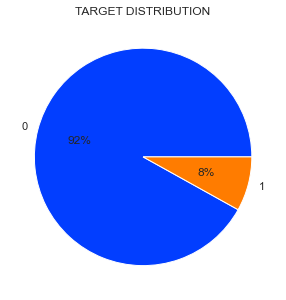

In [1276]:
fig = plt.figure(figsize=(10,5))
colors = sns.color_palette('bright')[0:5]
plt.pie(Final_application_data['TARGET'].value_counts(), labels = ['0','1'] , colors = colors, autopct='%.0f%%')
plt.title('TARGET DISTRIBUTION')
plt.show()

#### The Target Variable is very imbalance in nature

In [1277]:
# splitting the data in two separate dataframe
New_application_data_0 = Final_application_data[Final_application_data['TARGET'] == 0]
New_application_data_1 = Final_application_data[Final_application_data['TARGET'] == 1]

> Out of all the data 92 % are not defaulter and 8 % are defaulter

# Univariate Analysis

### Univariate Analysis For Categorical Analysis

In [1278]:
## For the Categorical Analaysis we can use BarPlot , CountPlot and Pie chart.
## For the Analysis we can use Count Plot
## We are creating a function for the count plot for categorical analysis so that we can reuse code multiple times

def univariate_categorical_countplot(columnname):
    sns.set(style="darkgrid")
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))   ## creating the subplot of row 1 and column 2
    
    ## For the first dataframe New_application_data_0 for client having non-payment diffculty
    sns.countplot(x = columnname , data = New_application_data_0 ,ax=ax1)
    ax1.set_title("Distribution of {} for Loan Non-Payement Difficulty".format(columnname) ,fontdict = {'fontsize':'15', 'fontweight':'5'})
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    for p in ax1.patches:
        total = len(New_application_data_0[columnname])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax1.annotate(percentage, (x, y), size = 14)
        
     ## For the Second dataframe New_application_data_1 for client having payment diffculty
    
    sns.countplot(x = columnname , data = New_application_data_1 ,ax=ax2)
    ax2.set_title("Distribution of {} for Loan Payement Difficulty".format(columnname),fontdict = {'fontsize':'15', 'fontweight':'5'})
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    for p in ax2.patches:
        total = len(New_application_data_1[columnname])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax2.annotate(percentage, (x, y), size = 14)
    
    plt.show()
   

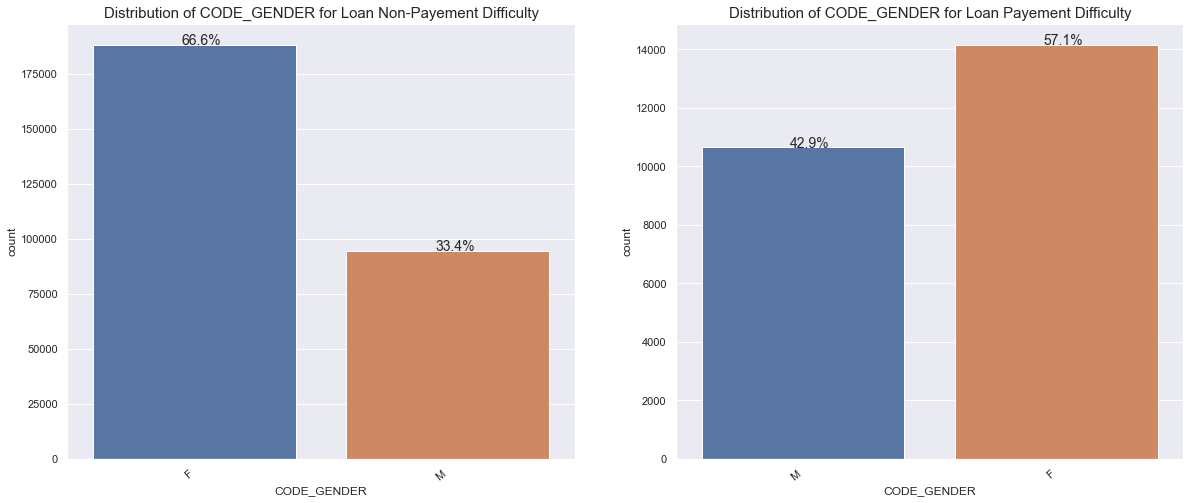

In [1279]:
univariate_categorical_countplot('CODE_GENDER')

> From the above graph we can conclude that: </br>- Women are more applying for loan as compared to men which is a unique point to note.</br>- We conculde that as female are  more applying for loan  as compared to men,because of this womens are also high in defaulter.</br>
> Men has 33.4% non defaulter while 42.9% are defaulter. It means men are likely to default as compared to women

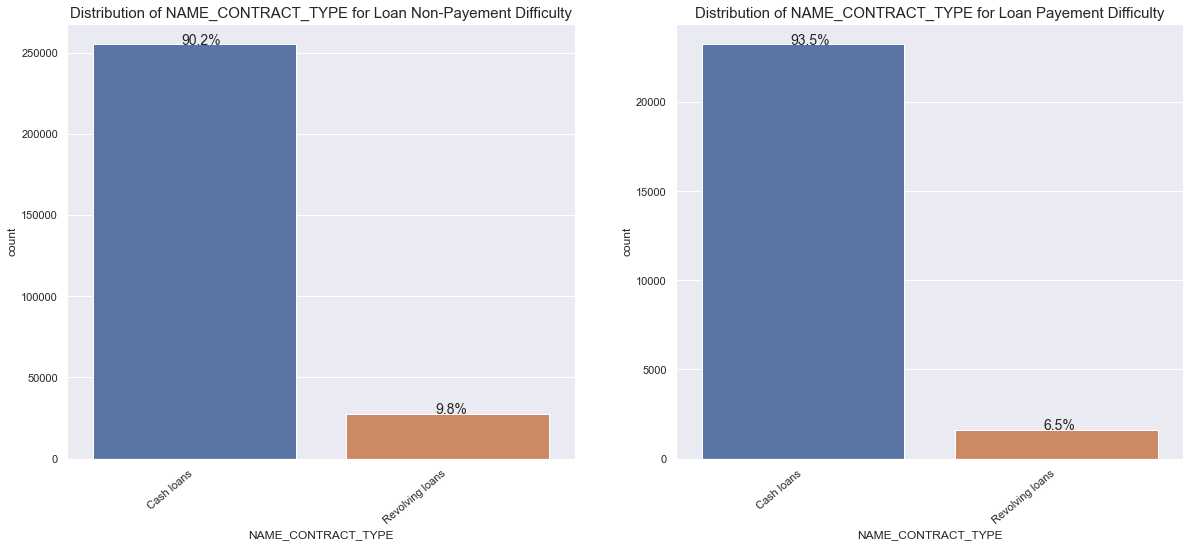

In [1280]:
univariate_categorical_countplot('NAME_CONTRACT_TYPE')

> We concluded that people prefer to take cash loans as compared to revolving loan while the defaulter in revolving loans are less at about 6.5%

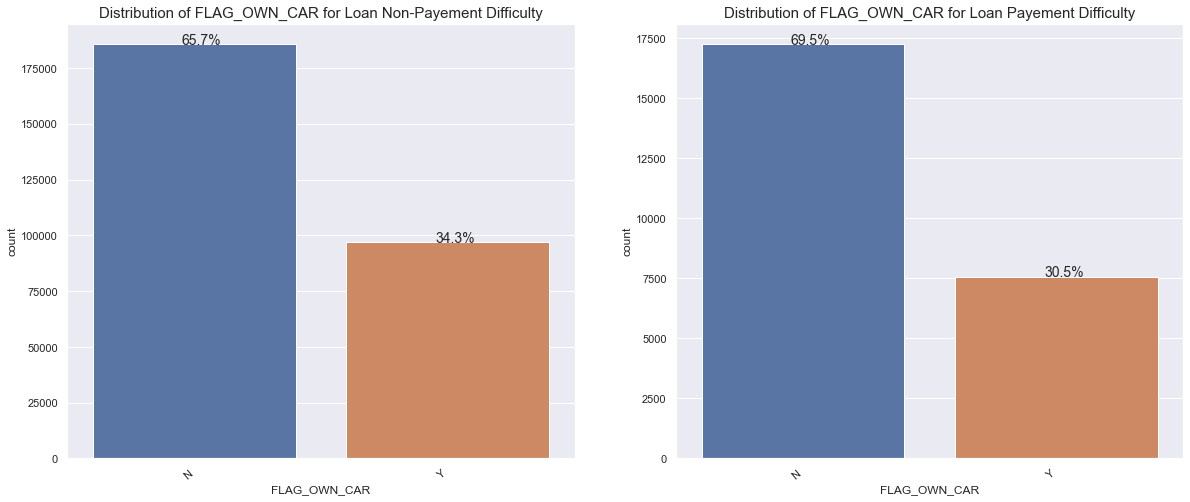

In [1281]:
univariate_categorical_countplot('FLAG_OWN_CAR')

> From the graph ,we can conclude that the client without cars prefer more to take loan as compared to client who have car. While the defaulter is also high for the client without car

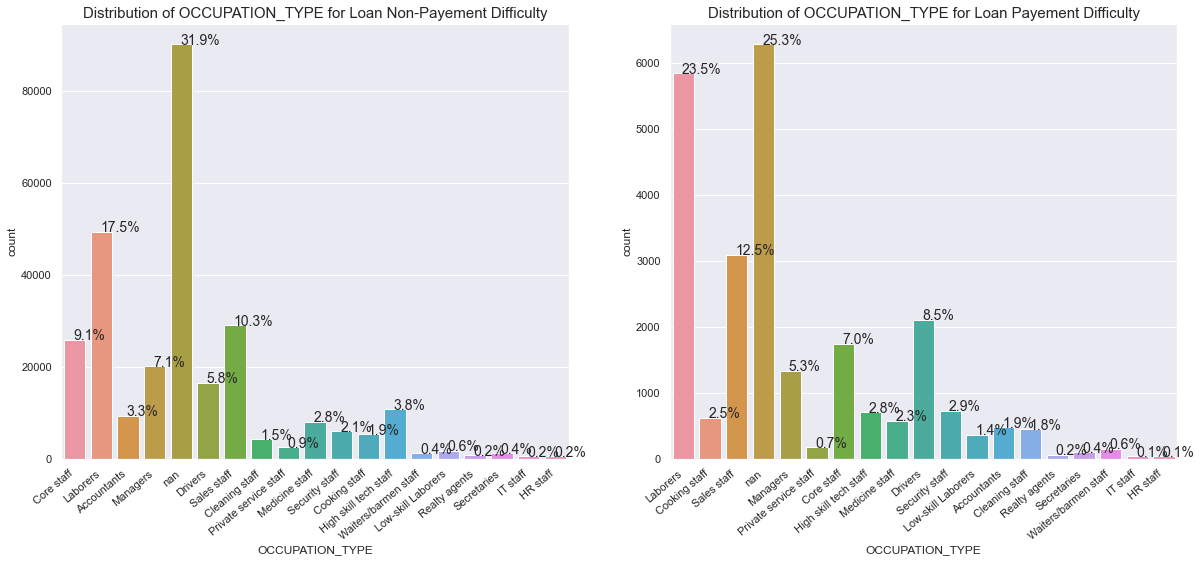

In [1282]:
univariate_categorical_countplot('OCCUPATION_TYPE')

> From the graph ,we can conclude that Laborers, Drivers , Low Skilled labors are more chances of being an defaulter

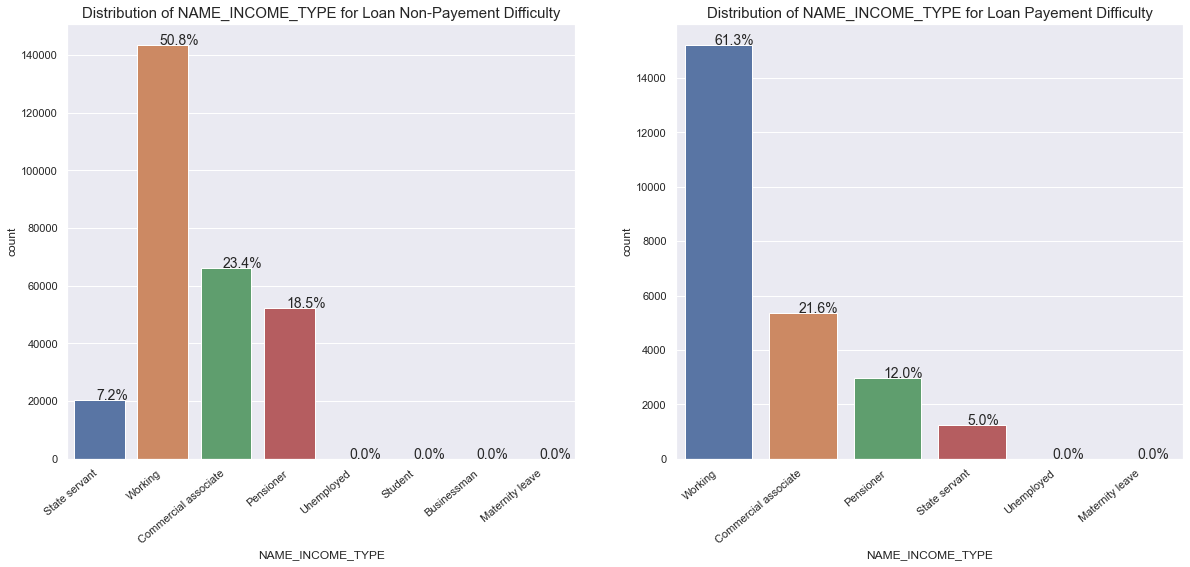

In [1283]:
univariate_categorical_countplot('NAME_INCOME_TYPE')

> From the above we conclude that the working class people contribute around 51 % as non deafulter and 61.3% as defaulter.</br> Students, Businessman ,Unemployed person has 0% defaulter.

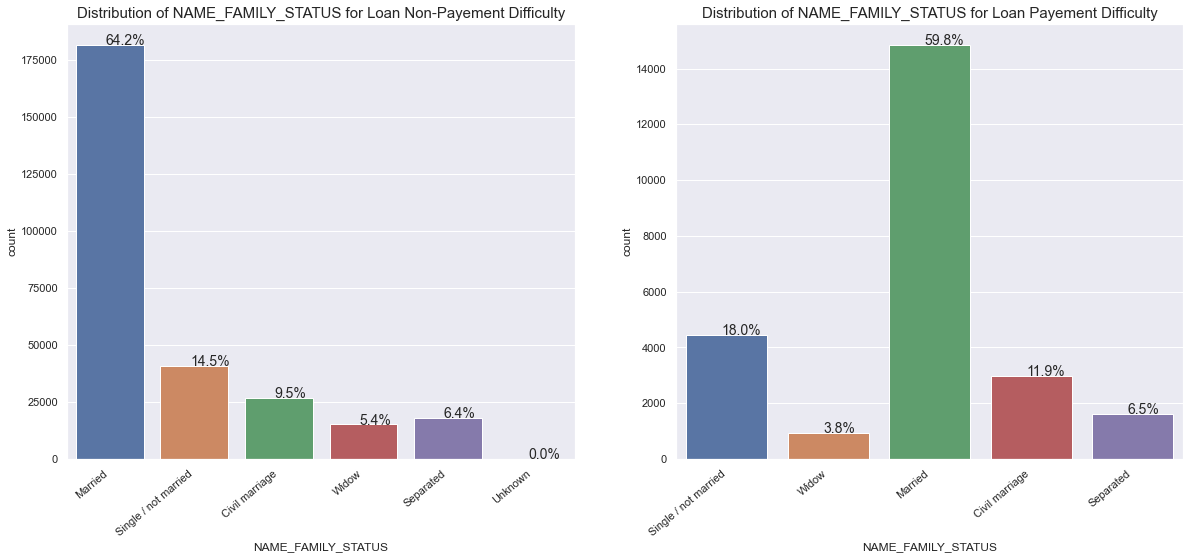

In [1284]:
univariate_categorical_countplot('NAME_FAMILY_STATUS')

> We observed that the married people are high in taking loan on which 64.2% are non-defaulter while 59.8% are defaulter. It is because married people need to take a loan for various household purposes

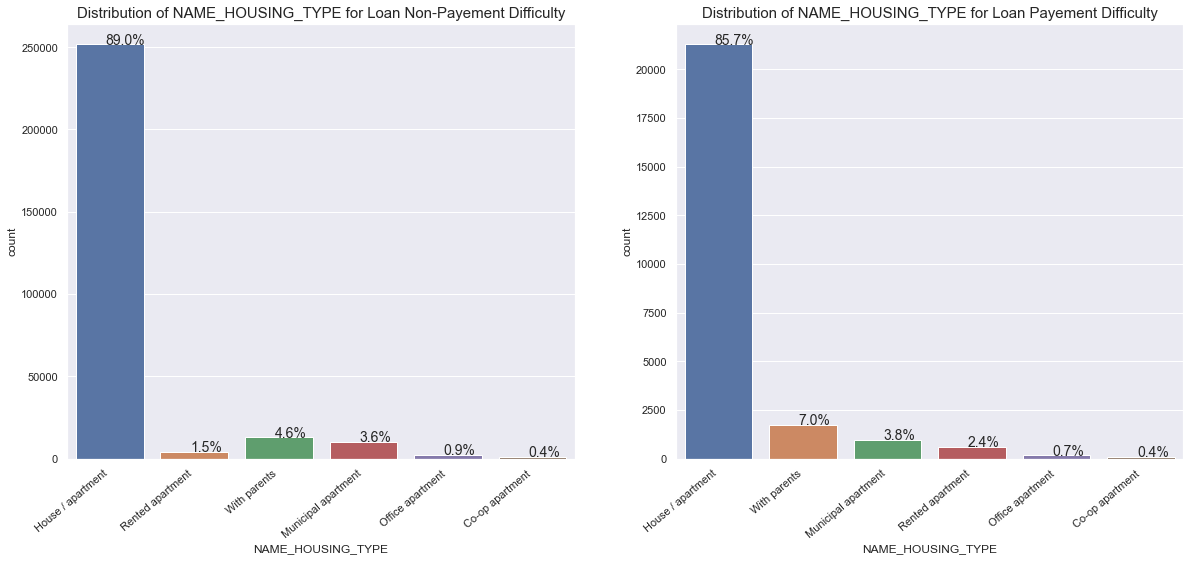

In [1285]:
univariate_categorical_countplot('NAME_HOUSING_TYPE')

> From the above, we conculde that the client who have House/Apartment are more apply for taking the loans on which 89 % are non defaulter and 85.7% are defaulter. While people who live with their parents faces payment difficulty as compared to others.

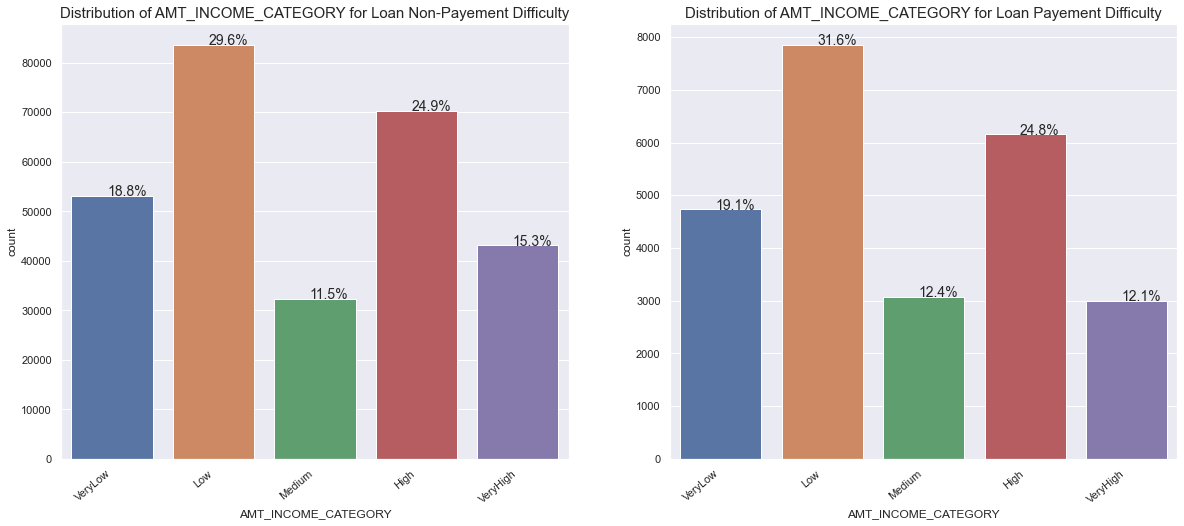

In [1286]:
univariate_categorical_countplot('AMT_INCOME_CATEGORY')

> The Low and High Income group are more applying for loan.</br> The very high income group are less defaulter of about 12.1% and non defaulter as 15.3%.

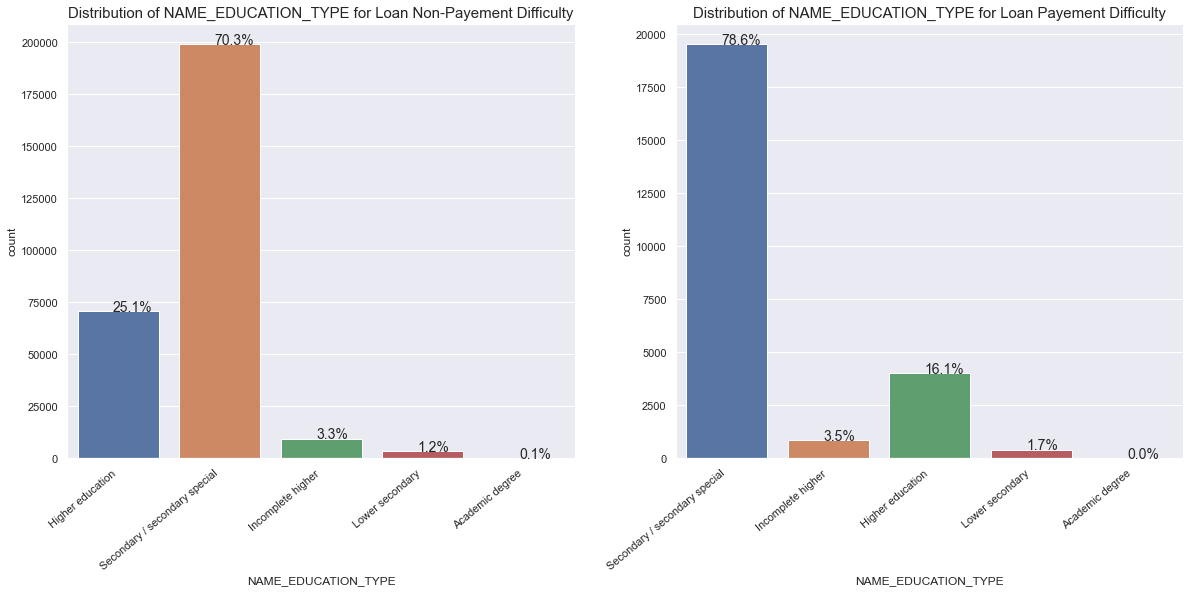

In [1287]:
univariate_categorical_countplot('NAME_EDUCATION_TYPE')

> We observe that the people who have secondary degree are high for applying loans while 70.3 % are non  defaulter and 78.6% are defaulter.
> People who has Academic degree have 0% defaulter and almost 0.1% non defaulter.

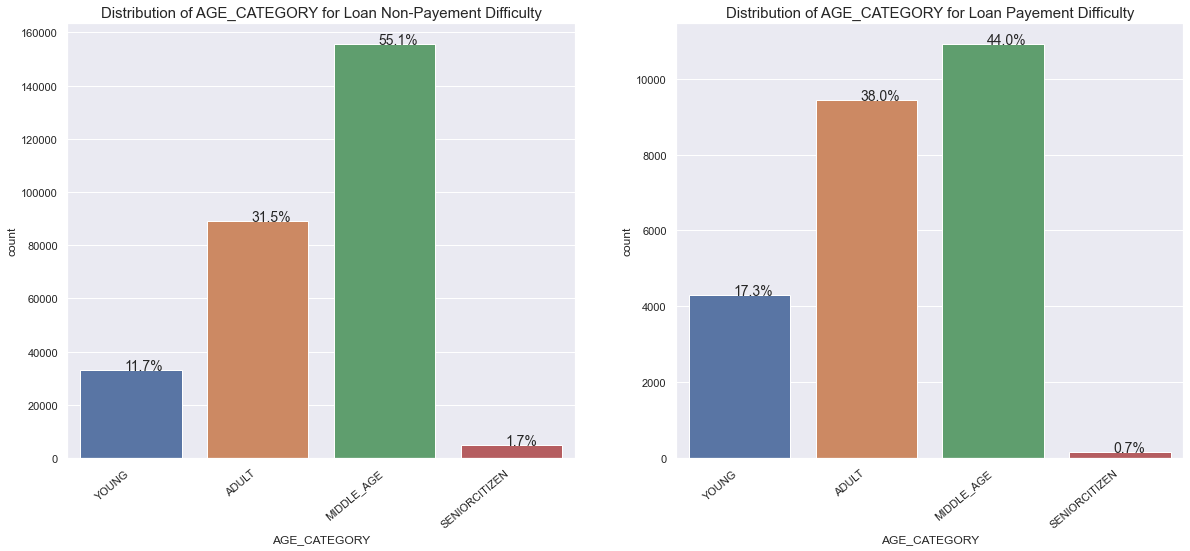

In [1288]:
univariate_categorical_countplot('AGE_CATEGORY')

> The senior citizen are less defaulter as compared to other age category. Middle_age are the highest defaulter of  about 44.0% and adult are also likely to defaulter at around 38%

# Univariate Analysis On Numerical Variable

In [1289]:
# Function for univariate plot for categorical variable
def univariate_numerical_distplot(dataframe,columnname,name):
    sns.set(style="darkgrid")
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))   ## creating the subplot of row 1 and column 2

    
    sns.distplot(dataframe[columnname] , ax = ax1)
    ax1.set_title("Distribution Histogram Plot for variable " + columnname +" for " +name)
    
    
    
    sns.boxplot( dataframe[columnname] , ax = ax2)
    ax2.set_title("Distribution Box Plot for variable "+ columnname +" for " +name)
    
    plt.show()

### 1) Loan Annuity

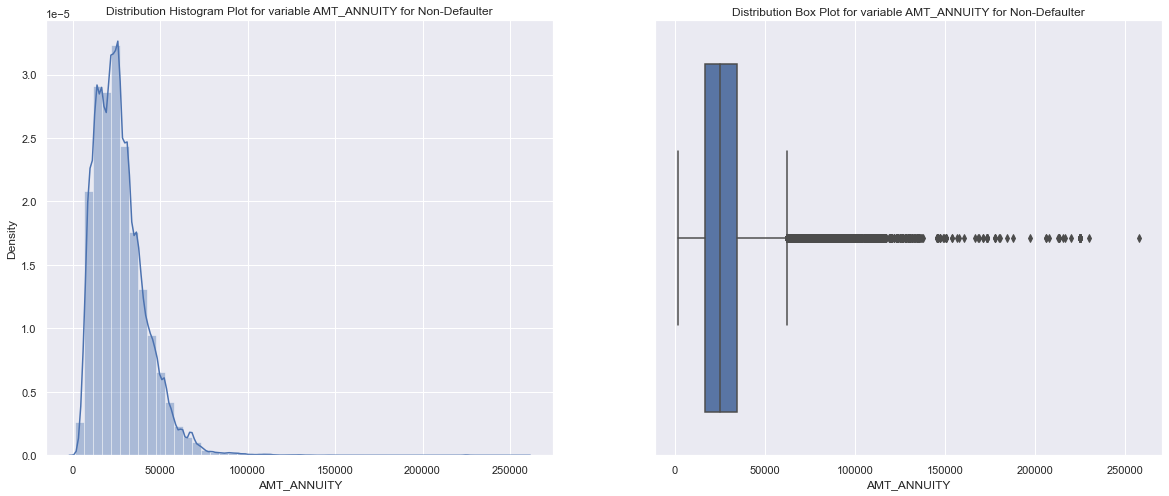

In [1290]:
univariate_numerical_distplot(New_application_data_0,'AMT_ANNUITY', 'Non-Defaulter')

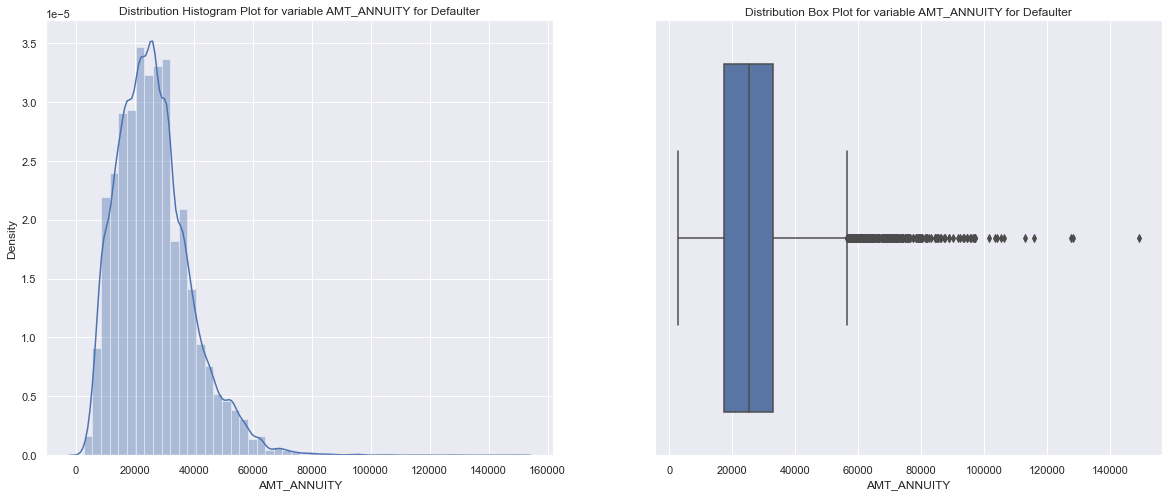

In [1291]:
univariate_numerical_distplot(New_application_data_1,'AMT_ANNUITY', 'Defaulter')

> From the above graph we observe that the distribution of AMT Annuity in case of non defaulter is maximum  approximately inbetween 10000 to 25000 while in case of defaulter the distribution is maximum approximately between 25000 to 40000. It is possible that the maximum Annual Annuity will lead to the defaulter. </br> We also observer that the there are outliners in both the cases.

### 2) Credit amount of the loan

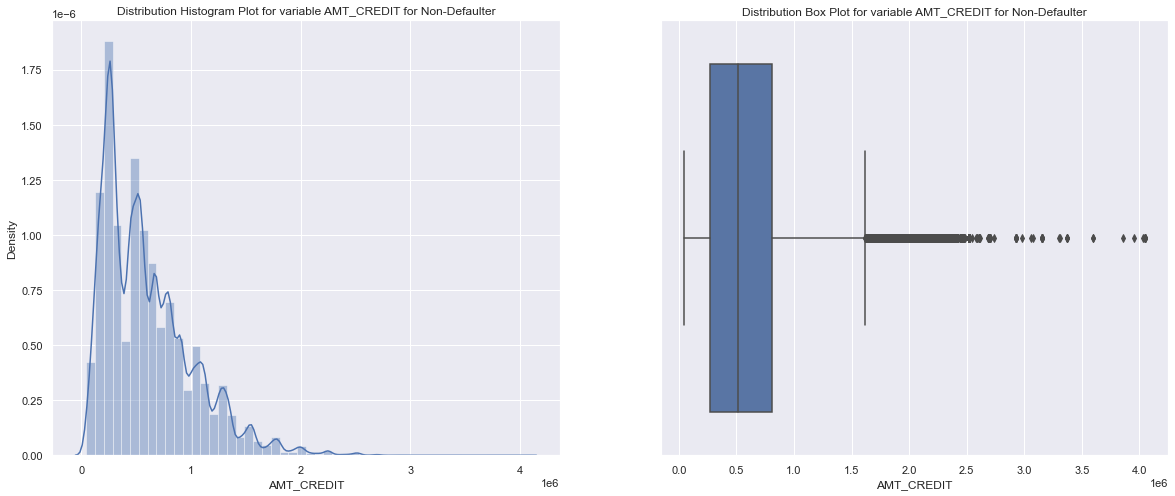

In [1292]:
univariate_numerical_distplot(New_application_data_0,'AMT_CREDIT', 'Non-Defaulter')

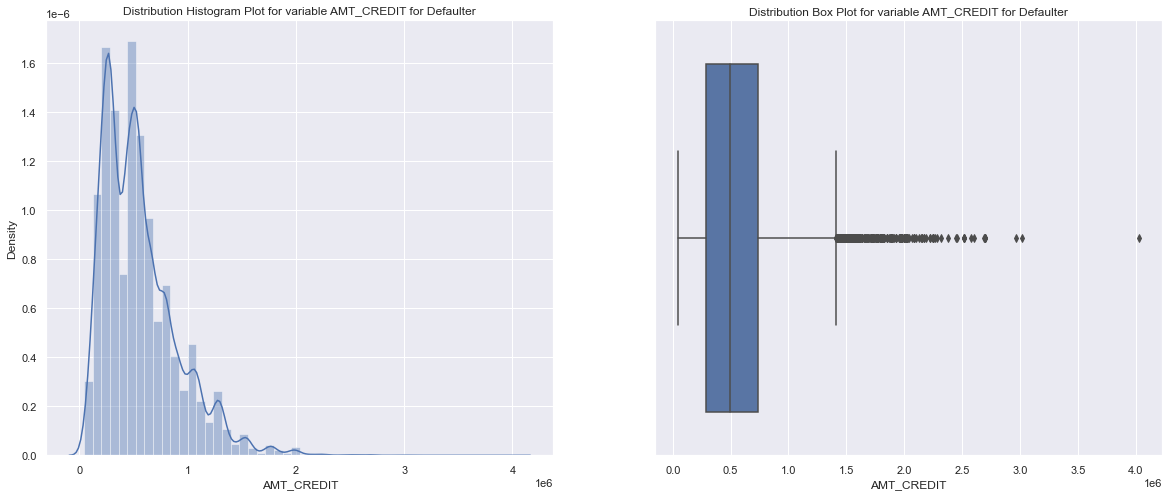

In [1293]:
univariate_numerical_distplot(New_application_data_1,'AMT_CREDIT', 'Defaulter')

> We can observe that some outliners in the data. There is the maximum distribution of data in the first quantile as compared to third quantile it means that most of the client are from first quantile having credit between 0 to 0.5 from the graph 

### 3) AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

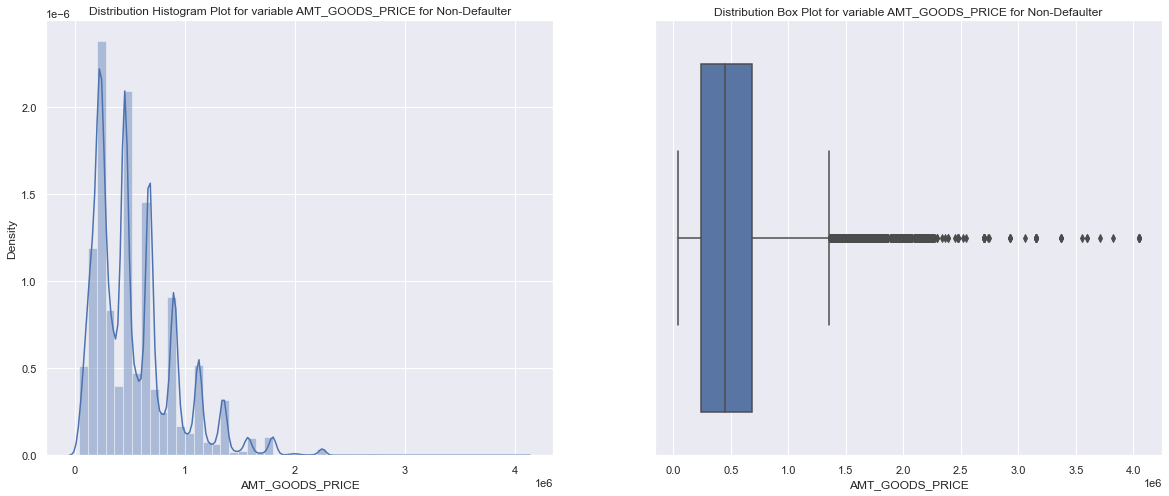

In [1294]:
univariate_numerical_distplot(New_application_data_0,'AMT_GOODS_PRICE', 'Non-Defaulter')

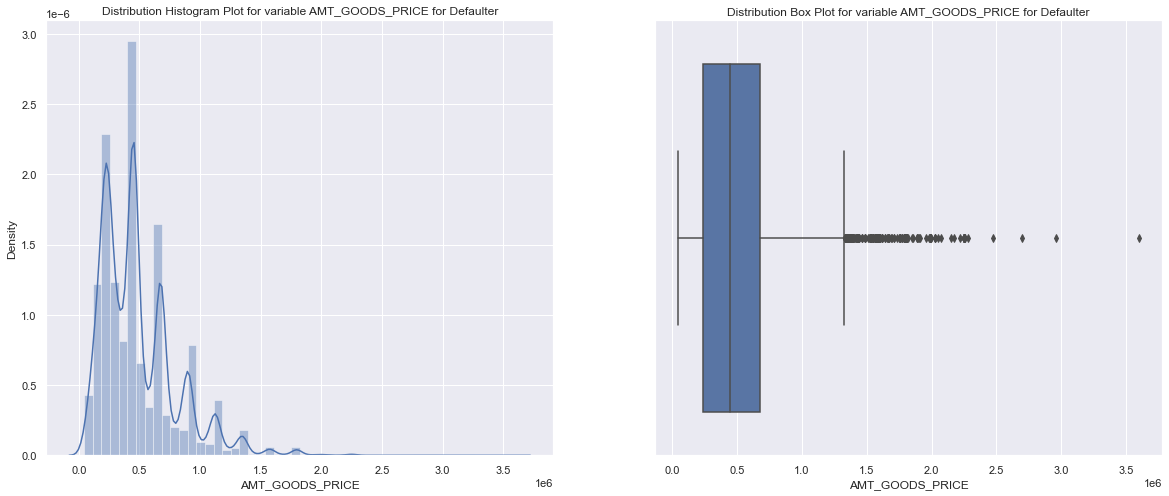

In [1295]:
univariate_numerical_distplot(New_application_data_1,'AMT_GOODS_PRICE', 'Defaulter')

> We can observe that some outliners in the data. There is the maximum distribution of data in the first quantile as compared to third quantile it means that most of the client are from first quantile having credit between 0 to 0.5. There is a similar distribution for both defaulter and non defaulter

# Bivariate Analaysis

### Bivariate For Two Contineous variable

In [1296]:
New_application_data_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   
5                    0.035792          46           1588             4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   
5                     2                            2                   Other   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1                       1.0                       0.0   
2                     

<Figure size 1440x576 with 0 Axes>

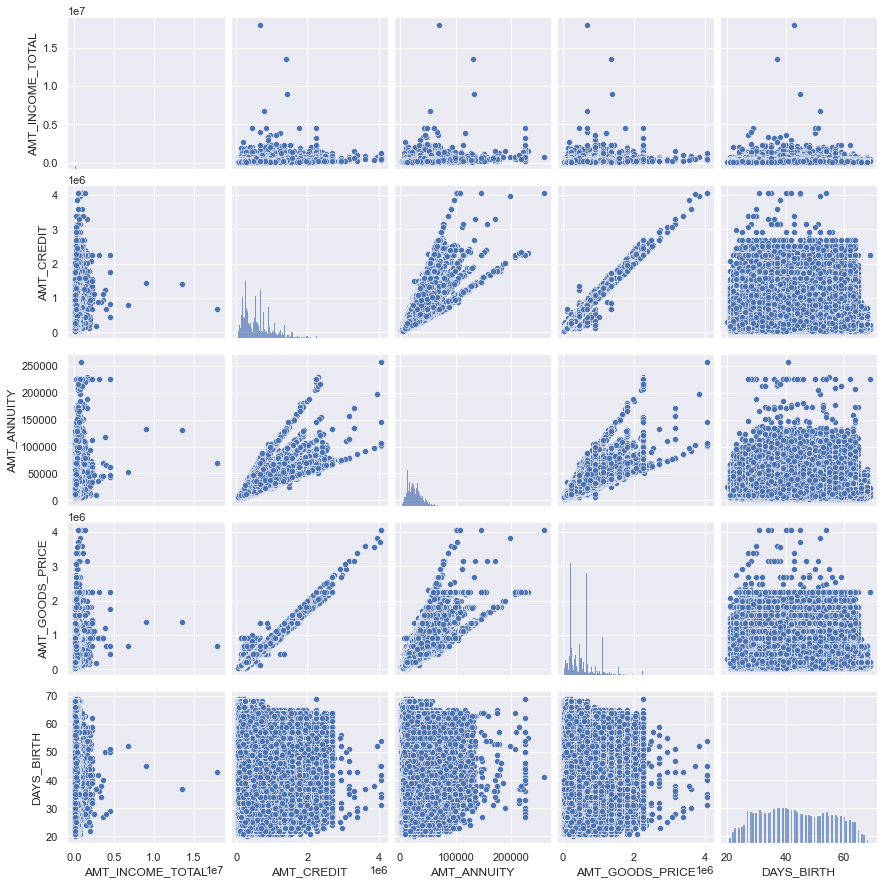

In [1297]:
## To find the relationship between two variablr we use the scatter plot..For multiple plots we use the pair plot
fig = plt.figure(figsize=(20,8))
num_columns = ['AMT_INCOME_TOTAL' ,'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' , 'DAYS_BIRTH']
sns.pairplot(New_application_data_0[num_columns].fillna(0))
plt.show()

<Figure size 1440x576 with 0 Axes>

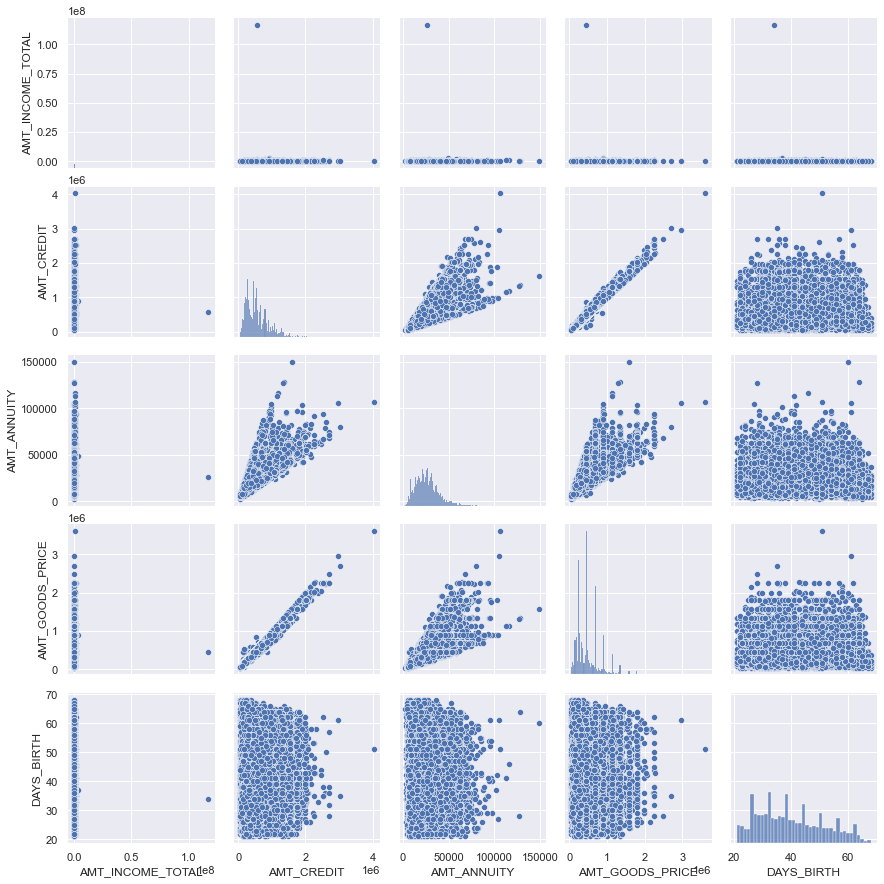

In [1298]:
fig = plt.figure(figsize=(20,8))
num_columns = ['AMT_INCOME_TOTAL' ,'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' , 'DAYS_BIRTH']
sns.pairplot(New_application_data_1[num_columns].fillna(0))
plt.show()

## Using Heat Map For further above analysis

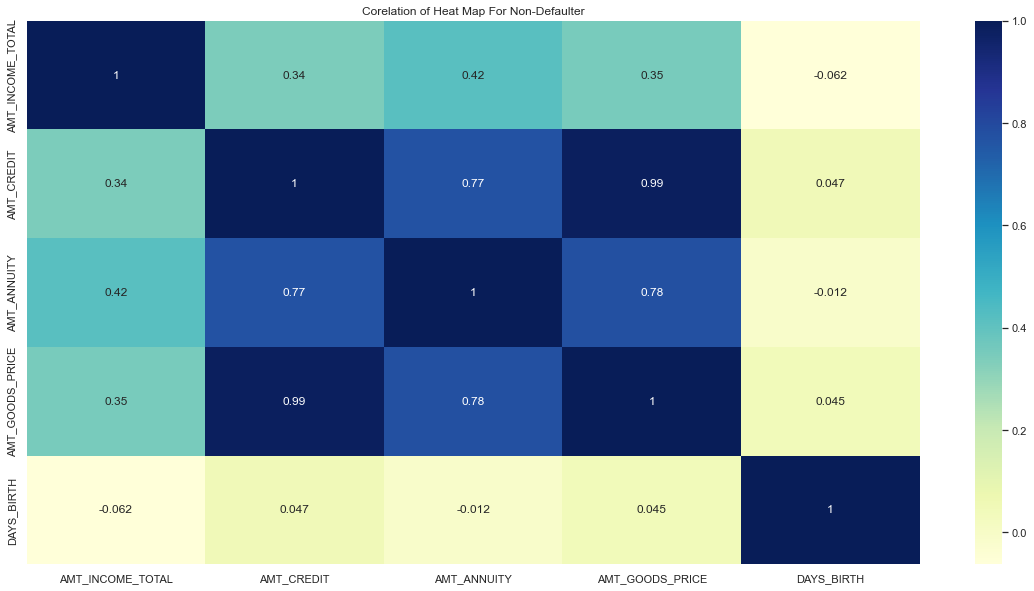

In [1299]:
## We also draw the heatmap to finding strong relationship between variable
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(New_application_data_0[num_columns].fillna(0).corr(), cmap="YlGnBu", annot=True)
  
plt.title( "Corelation of Heat Map For Non-Defaulter" )
plt.show()

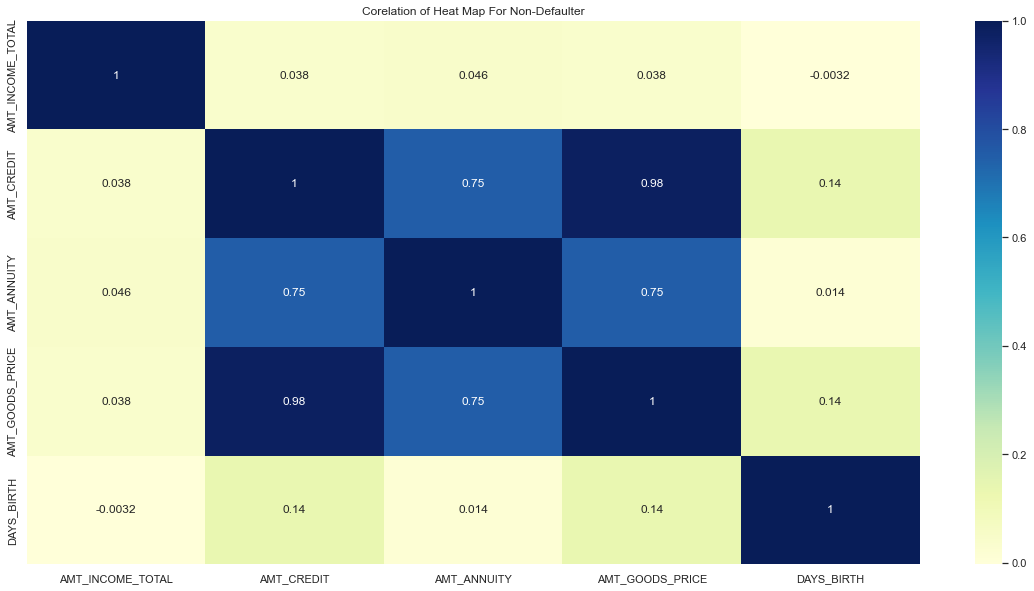

In [1300]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(New_application_data_1[num_columns].fillna(0).corr(), cmap="YlGnBu", annot=True)
  
plt.title( "Corelation of Heat Map For Non-Defaulter" )
plt.show()

> -We observed from the above chart that there is a strong and linear coorelation between AMT_CREDIT and AMT_GOODS_PRICE.</br> -  Also there is some linear correlation between AMT_CREDIT and AMT_ANNUITY to the some extent and after that the point are scatter as the AMT_CREDIT increases.

## Bivariate Analysis For Category And Contineous Variable

In [1301]:
# we will create a Bar graph for categorical column
def bi_category_bar(col1,col2):
    sns.set_style('darkgrid')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))   ## creating the subplot of row 1 and column 2

    
    sns.boxplot(x =col1, y =col2, data = New_application_data_0, palette ='plasma' ,ax=ax1)
    ax1.set_title("Box Plot for variable " +col1 + " And "+col2 +" for NonDefaulter",fontdict = {'fontsize':'15', 'fontweight':'5'})
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    
    
    
    sns.boxplot(x =col1, y =col2, data = New_application_data_1, palette ='plasma' ,ax=ax2)
    ax2.set_title("Box Plot for variable " +col1 + " And "+col2 +" for Defaulter",fontdict = {'fontsize':'15', 'fontweight':'5'})
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    plt.show()
 
    # plot the graph using the default estimator mean
    

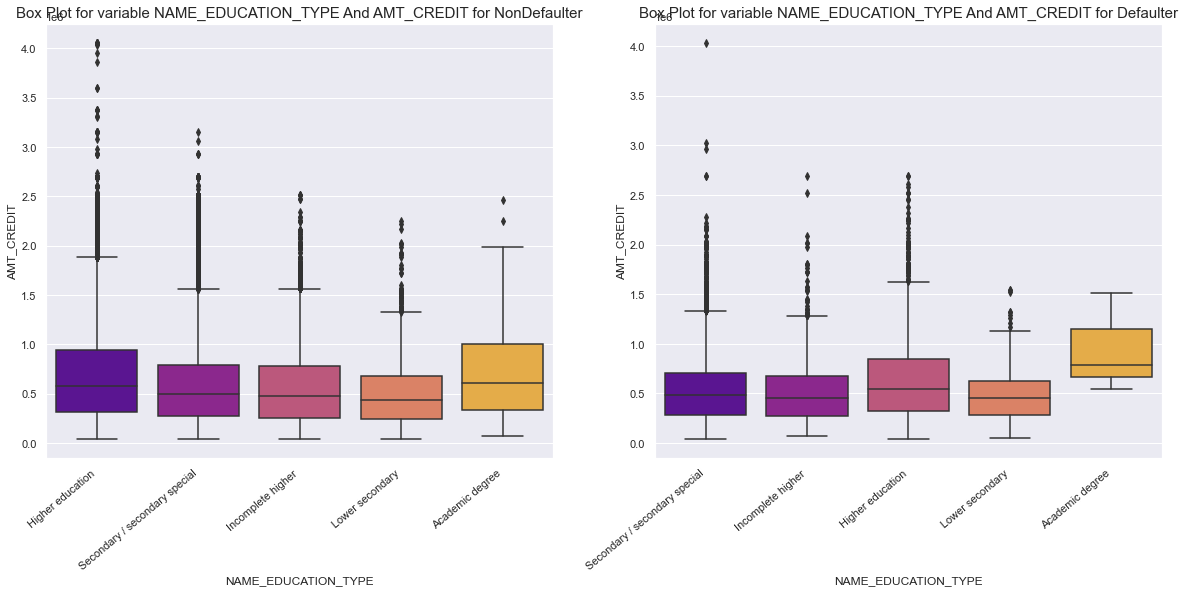

In [1302]:
bi_category_bar("NAME_EDUCATION_TYPE" ,"AMT_CREDIT")

> From the above box plot we observe that the there is less chance of default if the AMT_Credit of the client is more than 3.0 for almost all the Education type except Secondary education, who has less number of client defaulter.</br> Client who has credit 2.5 are less likely to default. So Company has to provide them loan by considering other factor also because some people are defaulter while some are not defaulter.

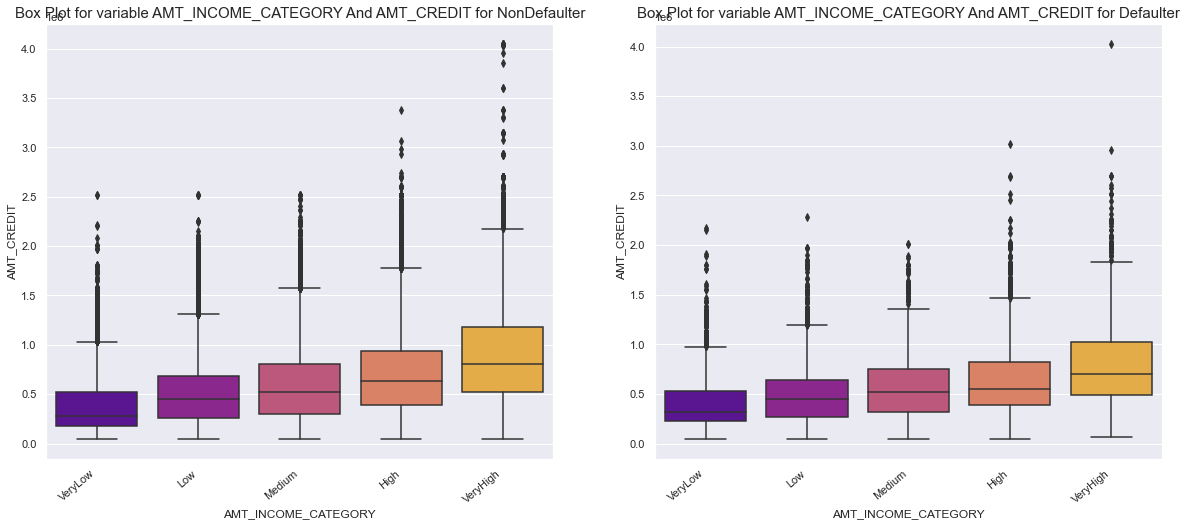

In [1303]:
bi_category_bar('AMT_INCOME_CATEGORY','AMT_CREDIT')

> From the above graph we conclude that for all the income category who has credit more than 3.0 as per graph have no defaulter. So they face no difficulty to pay. And there are some client who has credit less than 3.0 some are defaulter and some are not. So to give the loan company have to consider other factor also.

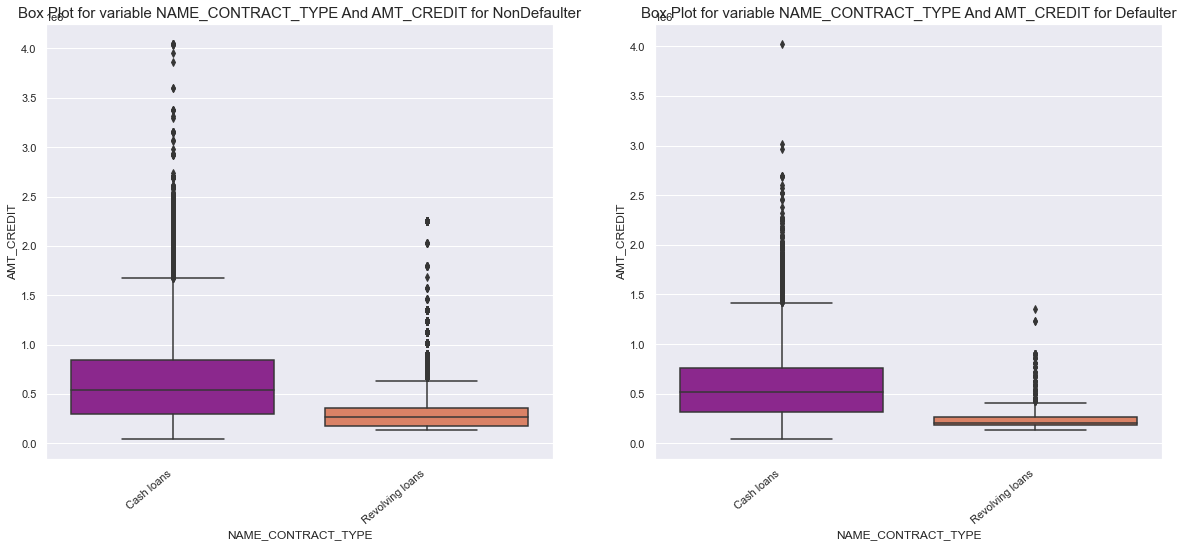

In [1304]:
bi_category_bar('NAME_CONTRACT_TYPE','AMT_CREDIT')

> From the above analysis we conclude that there are high chance that people who prefer cash loan and has credit less than 1.5 have more chances for Defaulter

## Multivariate Analysis For Category And Category Variable



In [1305]:
table_data= pd.pivot_table(application_data, values='TARGET', index=['CODE_GENDER','AMT_INCOME_CATEGORY'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

In [1306]:
table_data

NAME_EDUCATION_TYPE              Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_CATEGORY                                      
F           VeryLow                      0.00000          0.057110   
            Low                          0.00000          0.048873   
            Medium                       0.00000          0.053780   
            High                         0.00000          0.048793   
            VeryHigh                     0.09375          0.039846   
M           VeryLow                      0.00000          0.077073   
            Low                          0.00000          0.075495   
            Medium                       0.00000          0.074796   
            High                         0.00000          0.068399   
            VeryHigh                     0.00000          0.050599   

NAME_EDUCATION_TYPE              Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_CATEGORY                                       
F           VeryLow                       0.088847         0.080000   
            Low                           0.079887         0.111543   
            Medium                        0.095299         0.096330   
            High                          0.069012         0.095406   
            VeryHigh                      0.075630         0.044944   
M           VeryLow                       0.132075         0.126649   
            Low                           0.102299         0.141129   
            Medium                        0.072687         0.178161   
            High                          0.098561         0.134146   
            VeryHigh                      0.075914         0.078125   

NAME_EDUCATION_TYPE              Secondary / secondary special  
CODE_GENDER AMT_INCOME_CATEGORY                                 
F           VeryLow                                   0.076681  
            Low                                       0.078739  
            Medium                                    0.080401  
            High                                      0.074182  
            VeryHigh                                  0.069986  
M           VeryLow                                   0.115754  
            Low                                       0.124367  
            Medium                                    0.119750  
            High                                      0.111190  
            VeryHigh                                  0.092496

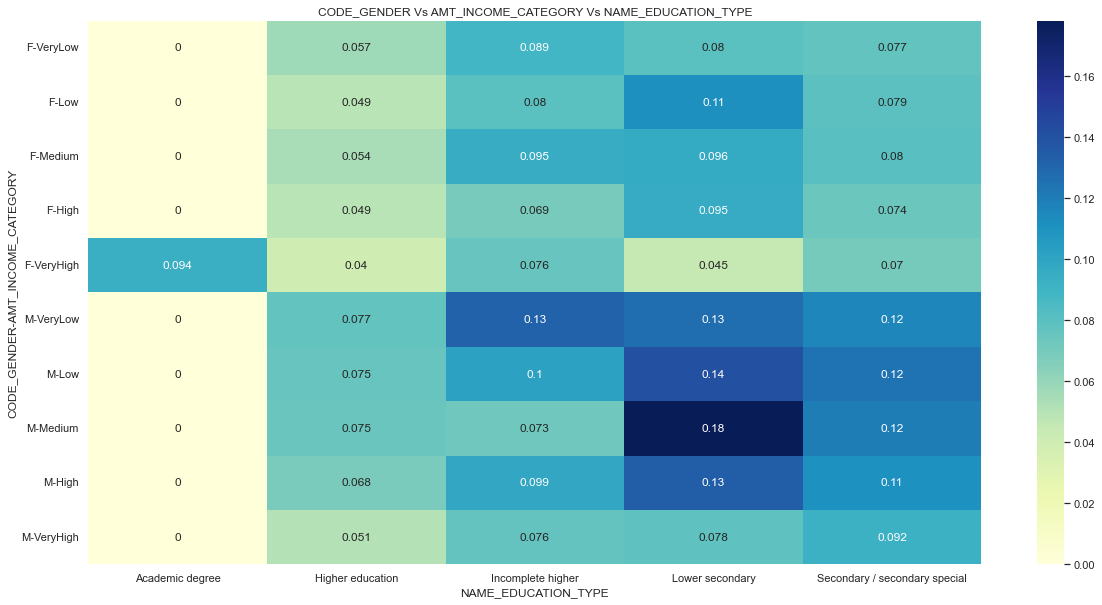

In [1307]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(table_data, cmap="YlGnBu", annot=True)
   
plt.title( 'CODE_GENDER Vs AMT_INCOME_CATEGORY Vs NAME_EDUCATION_TYPE' )
plt.show()

> From the table, we conclude that female who has Low income category and LowerEducation has high loan payment difficulty.</br>
 Male who has medium income and lower secondary education has high loan paying difficulty.

## Top Correlation

In [1308]:
# corelation For Target 0 dataframe
corr=New_application_data_0.corr(method = 'pearson')
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation  \
412               FLAG_EMP_PHONE             DAYS_EMPLOYED    -0.999756   
734     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
190              AMT_GOODS_PRICE                AMT_CREDIT     0.987022   
639  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT     0.950149   
560              CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571   
766     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332   
191              AMT_GOODS_PRICE               AMT_ANNUITY     0.776421   
159                  AMT_ANNUITY                AMT_CREDIT     0.771297   
287                DAYS_EMPLOYED                DAYS_BIRTH     0.626028   
411               FLAG_EMP_PHONE                DAYS_BIRTH    -0.621989   

     Abs_Correlation  
412         0.999756  
734         0.998508  
190         0.987022  
639         0.950149  
560         0.878571  
766         0.859332  
191         0.776421  
159         0.771297  
287         0.626028  
411         0.621989

In [1309]:
# corelation For Target 1 dataframe
corr=New_application_data_1.corr(method = 'pearson')
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation  \
412               FLAG_EMP_PHONE             DAYS_EMPLOYED    -0.999705   
734     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
190              AMT_GOODS_PRICE                AMT_CREDIT     0.982783   
639  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT     0.956637   
560              CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484   
766     DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.868994   
191              AMT_GOODS_PRICE               AMT_ANNUITY     0.752295   
159                  AMT_ANNUITY                AMT_CREDIT     0.752195   
287                DAYS_EMPLOYED                DAYS_BIRTH     0.582441   
411               FLAG_EMP_PHONE                DAYS_BIRTH    -0.578783   

     Abs_Correlation  
412         0.999705  
734         0.998269  
190         0.982783  
639         0.956637  
560         0.885484  
766         0.868994  
191         0.752295  
159         0.752195  
287         0.582441  
411         0.578783

> From above table we observe that the TOP 10 correlation columns are same for Target 0 and Target 1 dataframes

# Previous Application Dataset

#### Data Loading

In [1310]:
application_data_prev = pd.read_csv('previous_application.csv')

In [1311]:
application_data_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [1312]:
application_data_prev.shape

(1670214, 37)

In [1313]:
application_data_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

### Check missing values

In [1314]:
application_data_prev.isnull().sum()/len(application_data_prev)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [1315]:
## Deleting the column whose missing value is greater than 50 %
application_data_prev = application_data_prev.loc[:,application_data_prev.isnull().mean()<=0.5]
application_data_prev.shape

(1670214, 33)

In [1316]:
# Value counts of Contract Status in previous application datafram
application_data_prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [1317]:
# In the dataframe we observed that some of the values of days column are negative similarly like the first dataframe.
#So converting from negative to positive
days_column = [col for col in application_data_prev if col.startswith('DAYS')]
application_data_prev[days_column]= abs(application_data_prev[days_column])

In [1318]:
application_data_prev.columns[(application_data_prev.isnull().sum()>0)]

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

> All the above null column values have null values greater than 22%. Removing the null values column will lead to the data loss and for the category column replacing with mode will create a biased towards one column so we can create the seperate category towards all the null values.

#### Note :  As per guildlines, it is not necessary to fill the null values in EDA

In [1319]:
# XNA and XAP values are being replaced by NaN
application_data_prev=application_data_prev.replace('XNA', np.NaN)
application_data_prev=application_data_prev.replace('XAP', np.NaN)

In [1320]:
# we will take a column which are relevant to the analysis and deleting a irrelevant column also.
dropcolumn=['DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL' ,
'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 
            'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','HOUR_APPR_PROCESS_START',
            'DAYS_DECISION','SELLERPLACE_AREA']
application_data_prev.drop(axis=1, columns=dropcolumn, inplace=True)
application_data_prev.shape

(1670214, 18)

In [1321]:
application_data_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.670213e+06     1.284699e+06  1.297984e+06  
mean   1.961140e+05     2.278473e+05  1.605408e+01  
std    3.185746e+05     3.153966e+05  1.456729e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    2.416050e+04     5.084100e+04  6.000000e+00  
50%    8.054100e+04     1.123200e+05  1.200000e+01  
75%    2.164185e+05     2.340000e+05  2.400000e+01  
max    6.905160e+06     6.905160e+06  8.400000e+01

## Univariate ANalysis

In [1322]:
def categorical_countplot(columnname):
    sns.set(style="darkgrid")
    fig,(ax1) = plt.subplots(1,1,figsize=(20,8))   ## creating the subplot of row 1 and column 2
    
    ## For the first dataframe New_application_data_0 for client having non-payment diffculty
    sns.countplot(x = columnname , data = application_data_prev ,ax=ax1)
    ax1.set_title("Distribution of {} ".format(columnname) ,fontdict = {'fontsize':'15', 'fontweight':'5'})
    
    for p in ax1.patches:
        total = len(application_data_prev[columnname])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax1.annotate(percentage, (x, y), size = 14)
    
    plt.show()

### 1) Contract Status

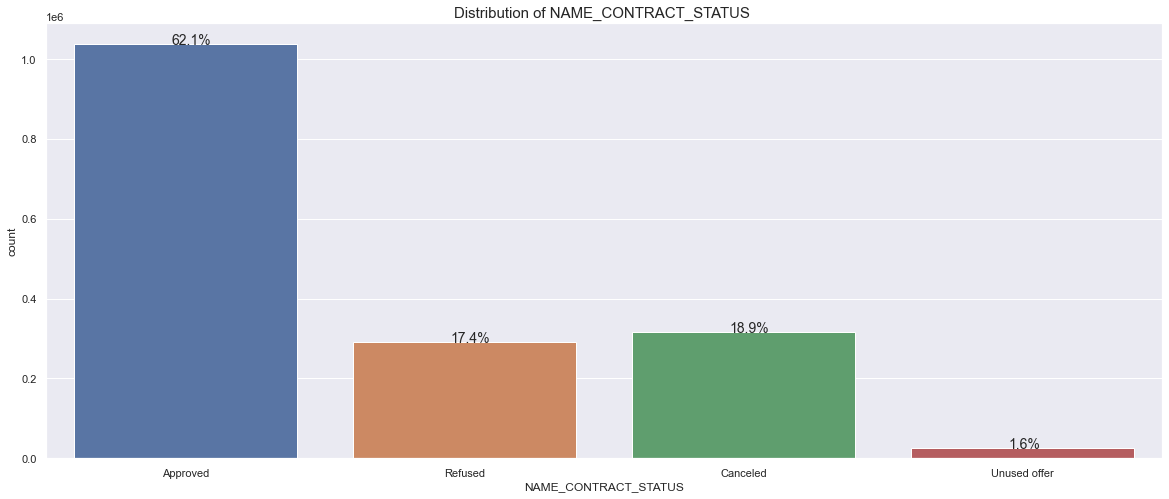

In [1323]:
categorical_countplot('NAME_CONTRACT_STATUS')

>  We can easily observed that the majority of loans are approved and very less percentage of loan which is 1.6% are unused offer and 17.4% of loan application are refused and 18.9% loan are canceled

### 2)  WEEKDAY_APPR_PROCESS_START

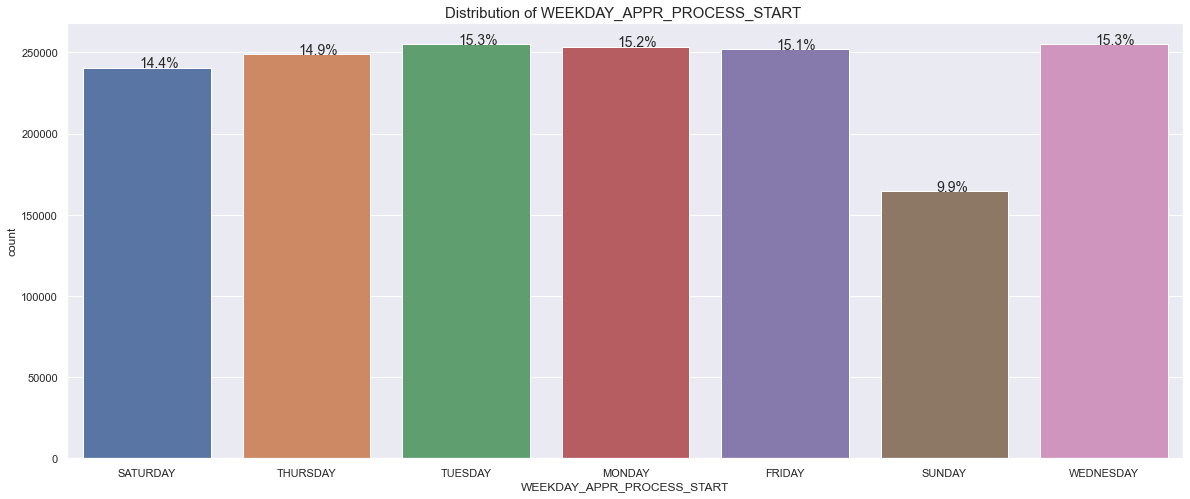

In [1324]:
categorical_countplot('WEEKDAY_APPR_PROCESS_START')

>  We can observe that there are less number of people apply on Sunday as compared to other days,which is similar.

### 3) NAME_PORTFOLIO

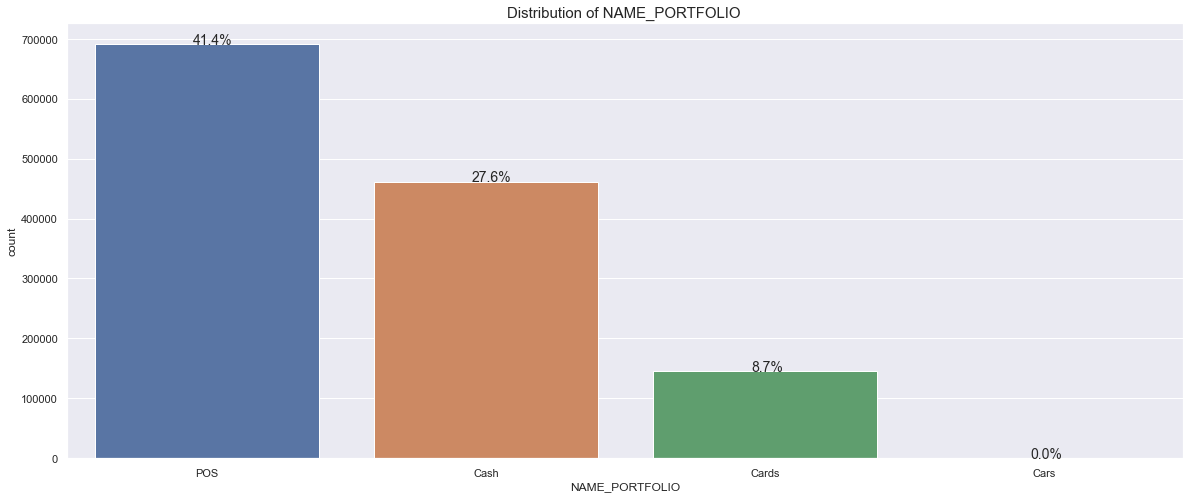

In [1325]:
categorical_countplot('NAME_PORTFOLIO')

> We observe that people prefer to apply for POS which is around 41% and also a fair amount of people apply for cash as well.

### 4) NAME_CLIENT_TYPE

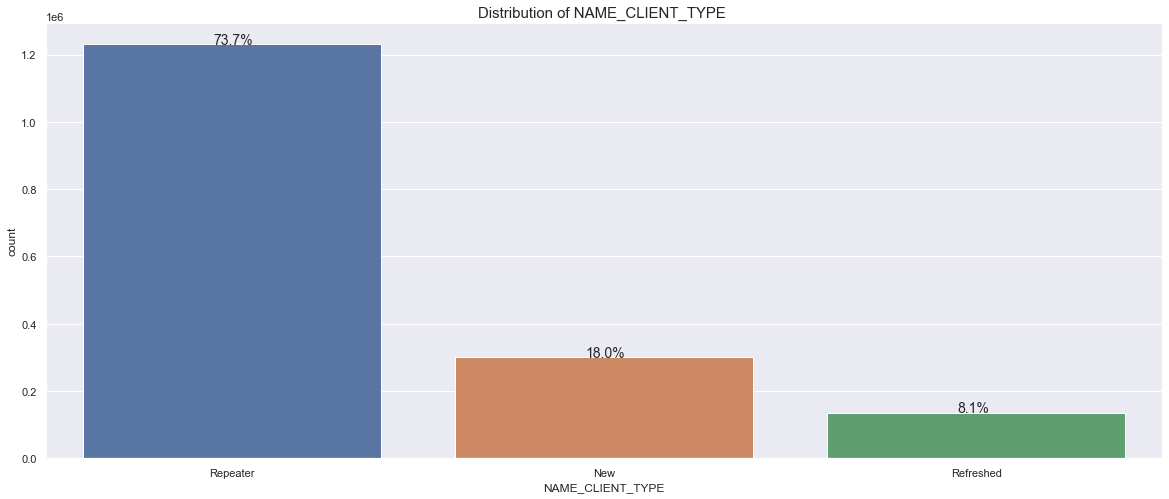

In [1326]:
categorical_countplot('NAME_CLIENT_TYPE')

> We conclude that almost 74% client are repeater and 18% are New client.

In [1327]:
def plot_categorygraph(var):

    sns.set(style="darkgrid")
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=application_data_prev,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

### 4) NAME_CONTRACT_TYPE

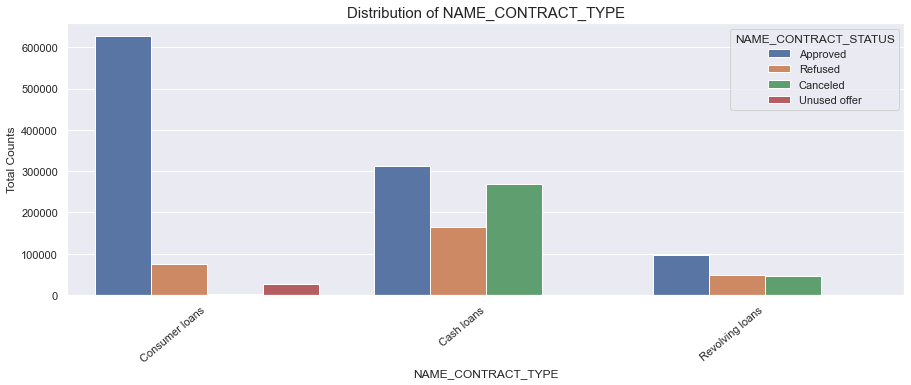

In [1328]:
plot_categorygraph('NAME_CONTRACT_TYPE')

> From the above chart, we analyse that the consumer loan and cash loans application are high. Although, the cash loans are refused more than others.

### 5) NAME_CLIENT_TYPE

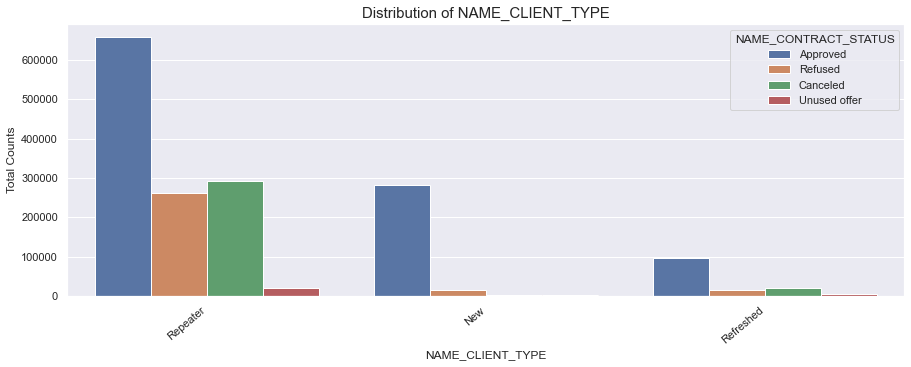

In [1329]:
plot_categorygraph('NAME_CLIENT_TYPE')

> Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

### Univariate analysis of numerical columns

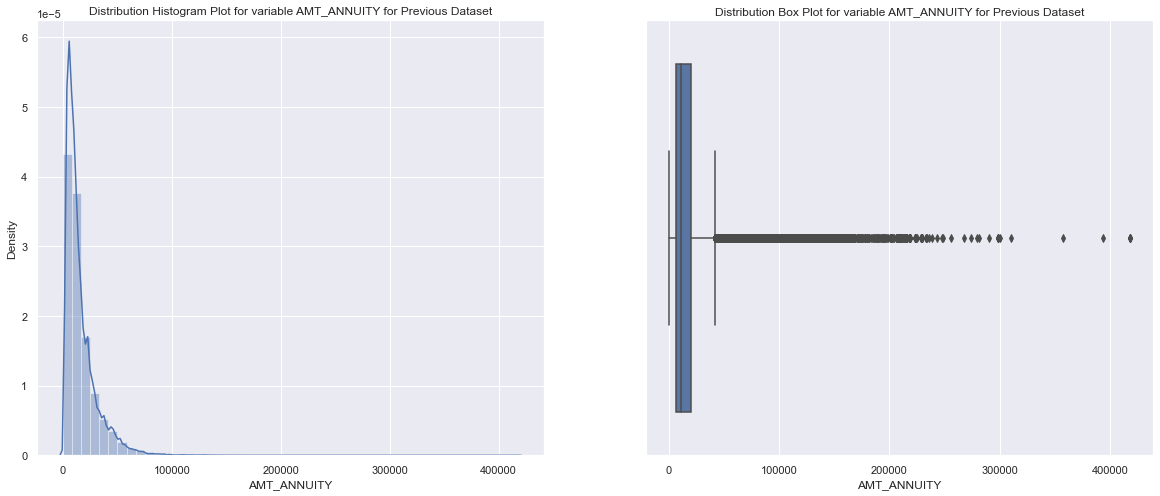

In [1330]:
univariate_numerical_distplot(application_data_prev,'AMT_ANNUITY','Previous Dataset')

> We observe that the major distribution of  AMT_ANNUITY is less than 50000. There are some outliners in the boxplot and the curve is not normal. 

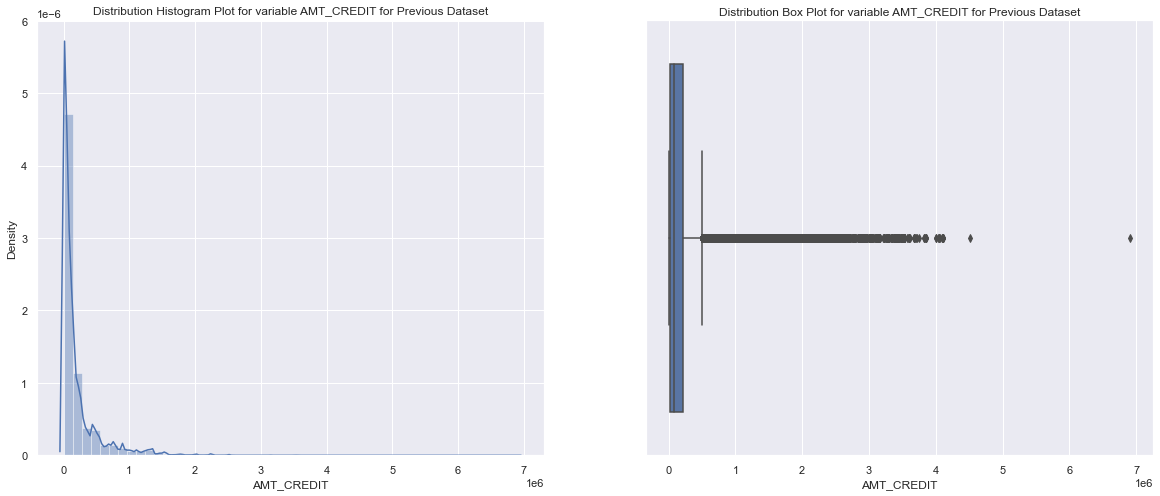

In [1331]:
univariate_numerical_distplot(application_data_prev,'AMT_CREDIT','Previous Dataset')

> We observe that the major distribution of  AMT_CREDIT is less than 0.5 as per graph values. There are some outliners in the boxplot and the curve is not normal. 

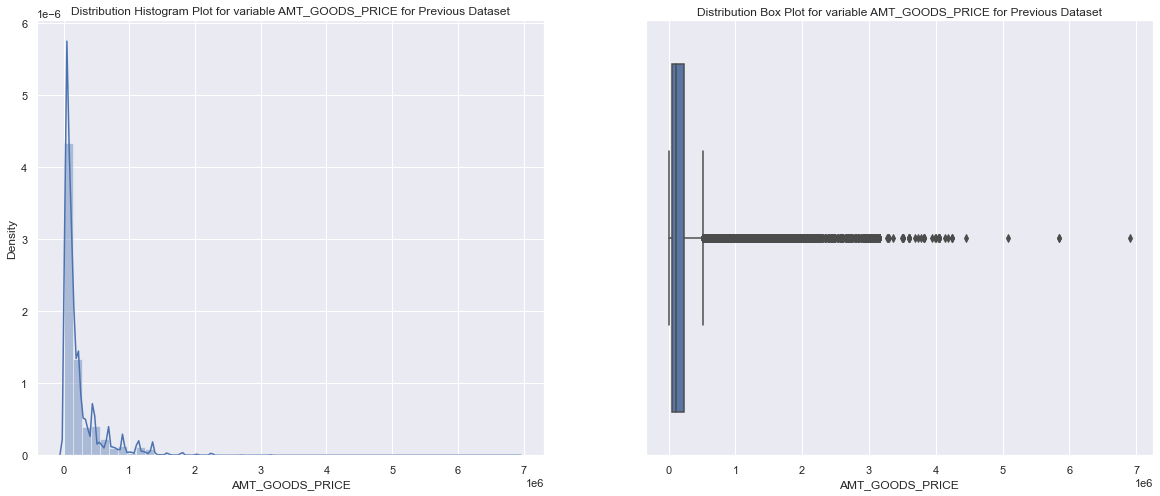

In [1332]:
univariate_numerical_distplot(application_data_prev,'AMT_GOODS_PRICE','Previous Dataset')

> There are some outliners in the boxplot and the curve is not normal. 

## Checking the corelation of previous dataset

In [1333]:
# corelation For  dataframe
corr=application_data_prev.corr(method = 'pearson')
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1          Column2  Correlation  Abs_Correlation
38  AMT_GOODS_PRICE  AMT_APPLICATION     0.999884         0.999884
39  AMT_GOODS_PRICE       AMT_CREDIT     0.993087         0.993087
31       AMT_CREDIT  AMT_APPLICATION     0.975824         0.975824
37  AMT_GOODS_PRICE      AMT_ANNUITY     0.820895         0.820895
30       AMT_CREDIT      AMT_ANNUITY     0.816429         0.816429
23  AMT_APPLICATION      AMT_ANNUITY     0.808872         0.808872
45      CNT_PAYMENT  AMT_APPLICATION     0.680630         0.680630
46      CNT_PAYMENT       AMT_CREDIT     0.674278         0.674278
47      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129         0.672129
44      CNT_PAYMENT      AMT_ANNUITY     0.394535         0.394535

# Bivariate Analysis On Numerical Column

<Figure size 1800x720 with 0 Axes>

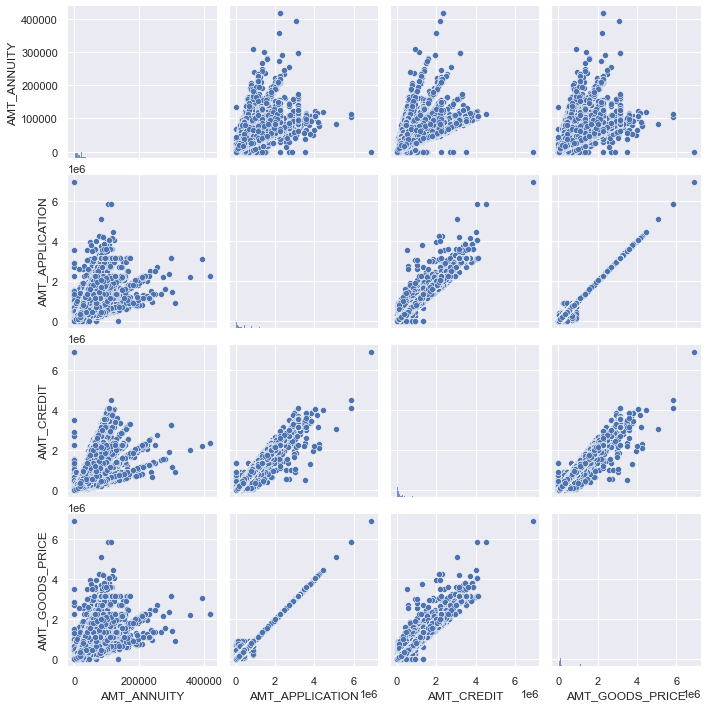

In [1334]:
fig = plt.figure(figsize=(25,10))
numerical_columns = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']
sns.pairplot(application_data_prev[numerical_columns].fillna(0))
plt.show()

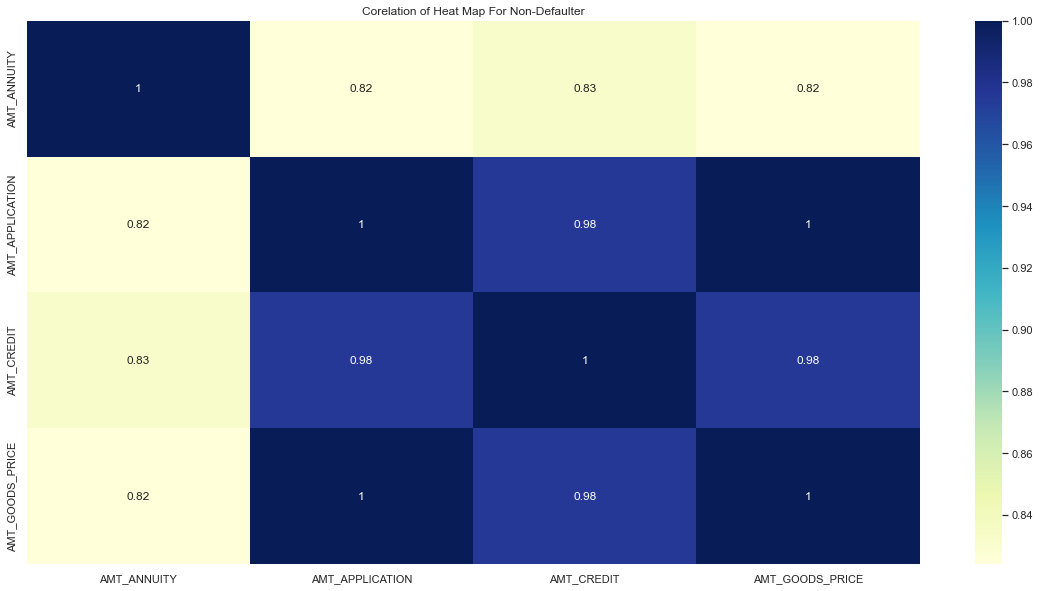

In [1335]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(application_data_prev[numerical_columns].fillna(0).corr(), cmap="YlGnBu", annot=True)
  
plt.title( "Corelation of Heat Map For Non-Defaulter" )
plt.show()

 #### From the Above charts, we observe that there is a strong corelation between AMT_APPLICATION  and AMT_GOOD_PRICE. Also , there is a strong corelation between AMT_CREDIT and AMT_APPLICATION.

> 1. Increase of annuity increases by the below factors <br>(1) How much credit did client asked on the previous application (AMT_APPLICATION)  <br> (2)Final credit amount on the previous application that was approved by the bank (AMT_CREDIT) <br>(3) Goods price of good (AMT_GOODS_PRICE) that client asked for on the previous application. <br><br>
>2. For how much credit did client ask on the previous application(AMT_APPLICATION) is highly influenced by the Goods price of good(AMT_GOODS_PRICE) that client has asked for on the previous application<br><br>
>3. Final credit amount disbursed to the customer previously(AMT_CREDIT), after approval is highly influence by the application amount(AMT_APPLICATION) and also the goods price of good (AMT_GOODS_PRICE) that client asked for on the previous application.

## Bivariate analysis on categorical vs numeric columns

In [1336]:
def bi_category(col1,col2):
    sns.set_style('darkgrid')
    fig,(ax1) = plt.subplots(1,1,figsize=(15,8))   ## creating the subplot of row 1 and column 2

    
    sns.boxplot(x =col1, y =col2, data = application_data_prev, palette ='plasma' ,ax=ax1)
    ax1.set_title(col1 + " VS "+col2,fontdict = {'fontsize':'15', 'fontweight':'5'})
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

## 1) NAME_CONTRACT_STATUS vs  AMT_ANNUITY

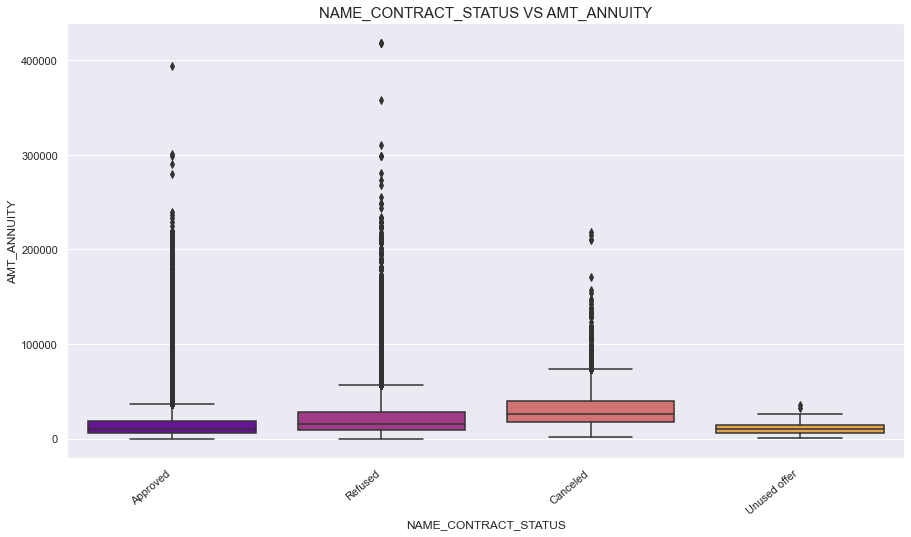

In [1337]:
bi_category('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

> From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.<br> We also see that applications with too high AMT ANNUITY also got refused more often than others.

##  NAME_CONTRACT_STATUS VS  AMT_CREDIT

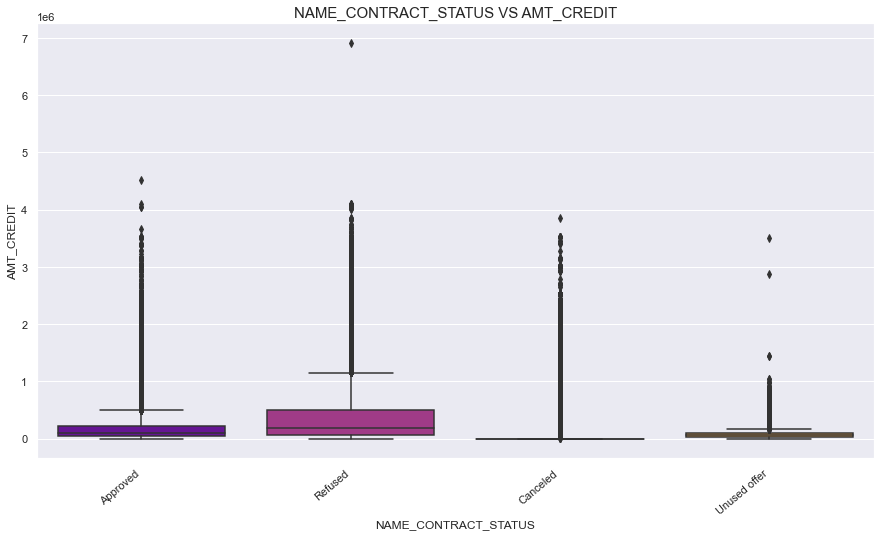

In [1338]:
bi_category('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

> From the above graph we can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

## Multivariate Analysis

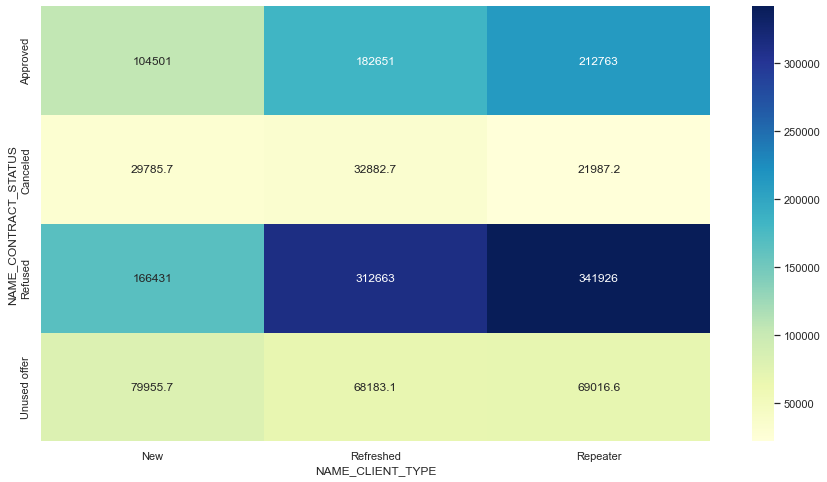

In [1339]:
# comparing NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE vs AMT_APPLICATION
plt.figure(figsize=(15,8))
multi =pd.pivot_table(data=application_data_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
##sns.heatmap(multi, annot=True,cmap='Blues', fmt="g")
sns.heatmap(multi, annot=True,cmap="YlGnBu",fmt="g")
plt.show()

##### From the above point we conclude that :

> Unused offer as very low application amount for almost all the client type.</br>Cancelled and Refused application amount is high. The bank may be refusing these application because possible client has very lowcredit amount.</br> Repeater's application amount is higher than the New client. This indicate that may be bank has more conducted attractive policies/rate of interest etc for repeat applicants.

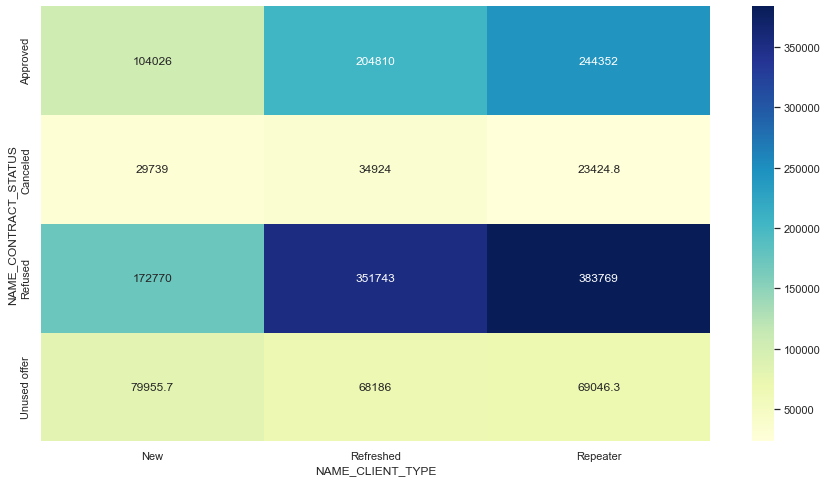

In [1340]:
# Checking contract status vs name client type aggregating over AMT CREDIT

multi=pd.pivot_table(data=application_data_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(multi, annot=True,cmap='YlGnBu', fmt="g")
plt.show()

##### From the above point we conclude that :

> Not able to understand why cancelled and refused application has credit amount?

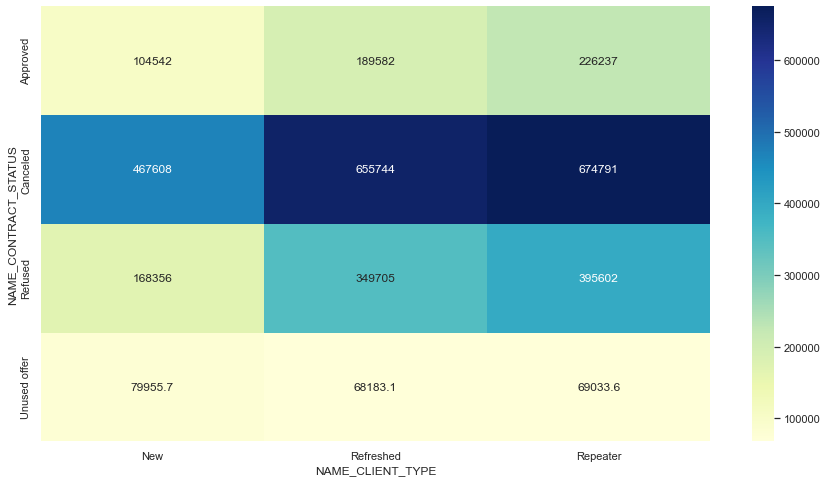

In [1341]:
multi=pd.pivot_table(data=application_data_prev, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(multi, annot=True,cmap='YlGnBu', fmt="g")
plt.show()

> From the above we concluded that all cancelled and refused cases have higher value of goods than other categories. This may be because they have low credit score.

# Merge DataFrame Analysis

In [1342]:
application_data_mergedataset  = pd.merge( Final_application_data,application_data_prev, how='left', on="SK_ID_CURR")

In [1343]:
application_data_mergedataset.shape

(1430155, 62)

In [1344]:
application_data_mergedataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 62 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430155 non-null  float64 
 10  AMT_GOODS_PRICE_x            1430155 non-null  float64 
 11  NAME_TYPE_SUITE_x            1430155 non-null  object  
 12  NAME_INCOME_TYPE            

In [1345]:
application_data_mergedataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.003541          45           1188             1186.0   
3                    0.003541          45           1188             1186.0   
4                    0.010032          52            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     1                            1                  School   
3                     1                            1                  School   
4                     2                            2              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2

## Analysis

In [1346]:
# For the Analysis we will use stacked bar use
def plotuni_mergeddf(xaxis,yaxis):
    
    plt.style.use('ggplot')
    sns.despine
    stackedbar = application_data_mergedataset.pivot_table(values='SK_ID_CURR', 
                      index=xaxis,
                      columns=yaxis,
                      aggfunc='count')
    stackedbar=stackedbar.div(stackedbar.sum(axis=1),axis='rows')*100
    sns.set()
    stackedbar.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {xaxis} on Loan Approval')
    plt.xlabel(f'{xaxis}')
    plt.ylabel(f'{yaxis}%')
    plt.show()

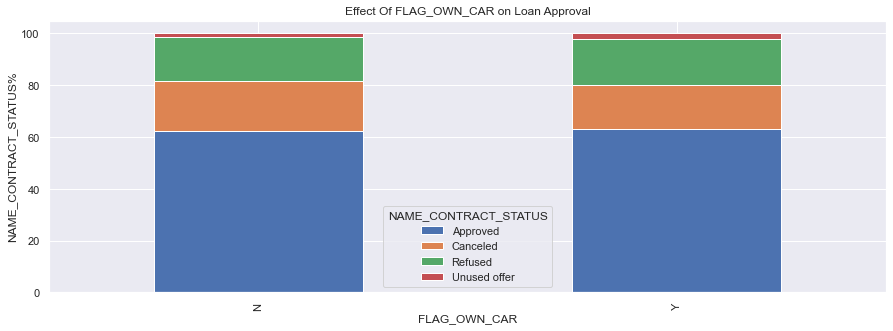

In [1347]:
plotuni_mergeddf('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

> From the above stacked bar chart we see that car ownership does not have any effect on application approval or rejection. But previous we observe that client who has a car has lesser chances of defaulter. For the higher loan amount , the bank can consider car ownership to accept the loan appliation.

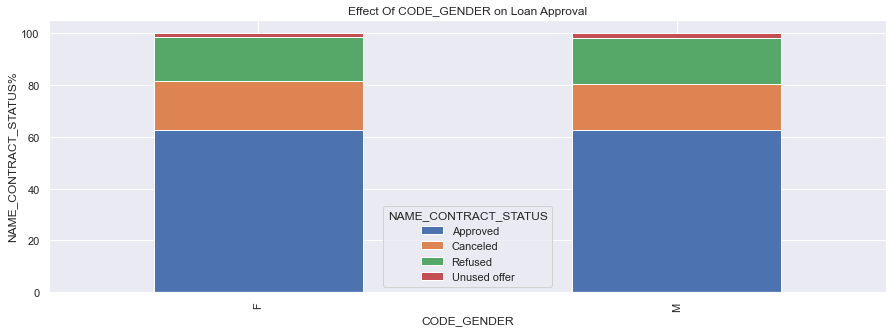

In [1348]:
plotuni_mergeddf('CODE_GENDER','NAME_CONTRACT_STATUS')

>From the above graph, we observe that code gender doesn't have any effect on application approval or rejection. 
> <br>But we observed earlier that female have lesser chances of default compared to males. So the bank can consider more weightage to female while approving a loan amount.

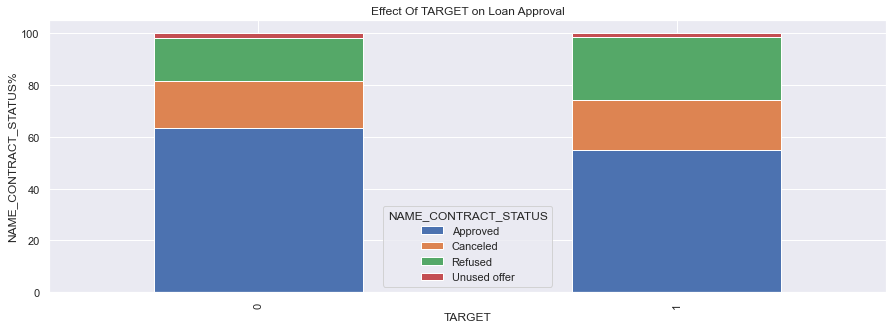

In [1349]:
plotuni_mergeddf('TARGET','NAME_CONTRACT_STATUS')

> From the above We observe that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting. 

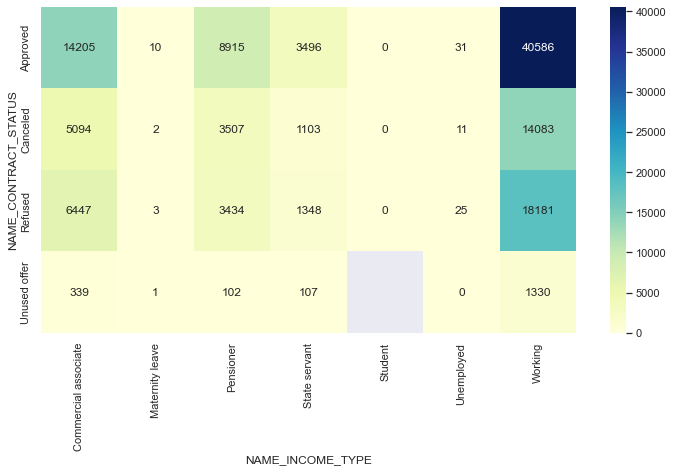

In [1350]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=application_data_mergedataset,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='YlGnBu', fmt="g")
plt.show()

##### From the above heatmap we observed that : 

>  1)) Since Target 1 is defaulter, higher on the above matrix shows correlation to defaulter.</br>
   2))  Previous applications with Cancelled , Unused,Refused loans also have default. This indicates that the financial company had Refused/cancelled previous application, but has approved the current loan application and is facing default on these loans.</br>
  3)) Working client with Approved status have highest number in defaulted as compared to others.</br>

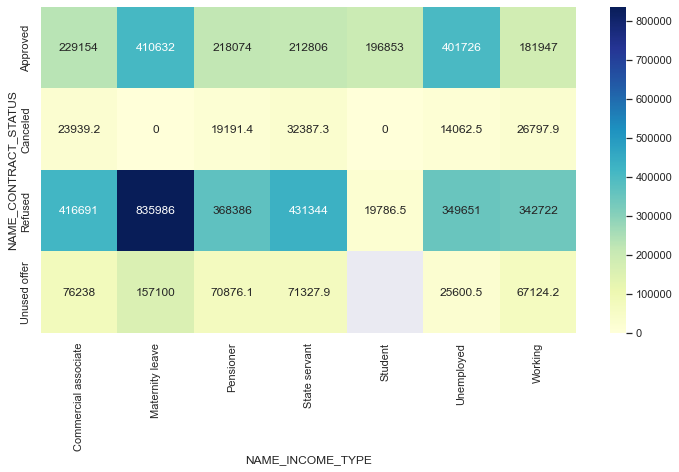

In [1351]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=application_data_mergedataset,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='YlGnBu', fmt="g")
plt.show()

##### From the above heatmap we observed that : 

>  1.It is noticable point that higher credit is offered to unemployment client and maternity leave. </br>
   2. Client whose previous application is refused also has a fairly high credit except student.

# Summary

### Insights For Defaulter:

- Female who has Low Income category and LowerEducation has a high chances of Defaulter while for Male who has medium income and lower secondary education has high chances of Defaulter.
- The Age group inbetween 28 to 40 has higher chances to be a defaulter. So the bank should have to scritinize the other factor for giving the loan.
- Some married people pay on time while some are facing difficulty in paying. So the bank should have to take a other factor also while approving the loan.
- Working class people are more defaulter but some working class people pay on time. So bank have to consider the other factor also while approving the loan.
- Previous applications with Cancelled, Refused, Unused loans also have default which is a matter of concern.   This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is  facing defaulter.
- Client whose previous application is cancelled, Refused are higher chances of a defaulter.
- Laborers, Drivers , Low Skilled labors are more chances of being an defaulter.
- Client who has without cars are fair chances of being an defaulter as compared to those who has cars but most of them are paying on time. So bank should have to consider other factor also.



### Insights For Non-Defaulter

- Bank should give more weightage to Female as they are regular pay on time.
- The senior citizen person who has more than 45 years of age are higher chances of non dafaulter.
- Business Man, Students are very less number of defaulter.
- Client whose previous application is approved are regular paying on time.